In [1]:
#We had some problems with the compatability of modules, therefore we ignored the Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Table of Contents

- 1. [Executive Summary](#1-Executive-Summary)
- 2. [Introduction](#2-introduction)
  - 2.1 [First Research Question](#21-first-research-question)
  - 2.2 [Second Research Question](#22-second-research-question)
- 3. [Exploratory Data Analysis](#3-exploratory-data-analysis)
  - 3.1 [Data Processing](#31-data-processing)
    - 3.1.1 [Importing the Dataset](#311-importing-the-dataset)
    - 3.1.2 [Descriptive Overview of the Dataset](#312-descriptive-overview)
    - 3.1.3 [Missing Values](#313-missing-values)
    - 3.1.4 [Imputing Numerical Values](#314-imputing-numerical-values)
    - 3.1.5 [Imputing Categorical Values](#315-imputing-categorical-values)
    - 3.1.6 [Checking for Outliers](#316-checking-for-outliers)
    - 3.1.7 [Winsorizing](#317-winsorizing)
    - 3.1.8 [Standardizing](#318-standardizing)
    - 3.1.9 [Distribution of Variables](#319-distribution-of-variables)
  - 3.2 [EDA for Research Question 1](#33-eda-for-research-question-1)
    - 3.2.1 [Correlation Matrix](#321-correlation-matrix)
  - 3.3 [EDA for Research Question 2](#33-eda-for-research-question-2)
  - 3.4 [EDA for Categorical Values](#34-eda-for-categorical-values)
- 4. [Research Question 1: Linear Regression](#4-research-question-1-linear-regression)
  - 4.1[ Linear Regression](#41-linear-regression)
  - 4.2 [Predicting](#42-predicting)
  - 4.3 [Homoscedasticitiy](#43-homescedasticity)
  - 4.4 [Log Transformation](#44-log-transformation)
  - 4.5 [Heteroscedasticity Robust Standard Errors](#47-heteroscedasticity-robust-standard-errors)
  - 4.6 [Q-Q Normality Plot](#46-qq-plot-normality-plot)
  - 4.7 [Checking for Multicollinearity](#47-checking-for-multicollinearity)
  - 4.8 [Autocorrelation of Errors](#48-autocorrelation-of-errors)
- 5. [Research Question 2: Logistic Regression](#5-research-question-2-logistic-regression)
  - 5.1 [Logistic Regression](#51-logistic-regression)
  - 5.2 [Inclusion of Non Linear Effect](#52-inclusion-of-non-linear-effect)
  - 5.3 [R²-Metric](#53-r-metrics)
  - 5.4 [Confusion Matrix](#54-confusion-matrix)
  - 5.5 [Hypothesis Testing](#55-hypothesis-testing)
  - 5.6 [Multicollinearity](#56)
- 6. [Interpretation](#6-interpretation)
  - 6.1 [Interpretation of Linear Regression](#61-interpretation-of-linear-regression)
  - 6.2 [Interpretation of Logisitc Regression](#62-interpretation-of-logistic-regression)
  - 6.3 [Conclusion](#63-conclusion)
- 7. [Appendix](#7-appendix)



# 1. Executive Summary

The primary goal of this project was to analyze factors influencing loan amounts and the likelihood of loan approval by utilizing both linear regression and logistic regression techniques. By exploring a dataset comprising various numerical and categorical variables, we aimed to understand how independent variables like income, property value, credit score, and debt-to-income ratio affect the dependent variables of loan amounts and loan approval status.

**Core Findings:**

1. **Factors Influencing Loan Amounts**:
   - `Income and Income Squared`: Our analysis revealed that income has a significant positive impact on the loan amount, meaning that higher income levels correspond to larger loan sizes.
   - `Property Value`: Similarly, property value emerged as one of the strongest predictors of loan amount. A higher property value typically leads to a larger loan amount, consistent with the collateral nature of real estate loans.
   - `Interest Rate Spread`: An inverse relationship was observed, where higher interest rate spreads tend to decrease the loan amount, indicating that increased borrowing costs may limit the size of loans applicants are willing to pursue.
   - `Debt-to-Income Ratio`: This was also found to be positively significant, suggesting that borrowers with higher debt-to-income ratios might be approved for larger loans.
   - `Credit Score`: Interestingly, credit score did not demonstrate a statistically significant effect on loan amount in our model, which was unexpected.

2. **Predictors of Loan Approval (Status)**:
   - `Income and Income Squared`: Both factors significantly predicted loan approval, indicating a non-linear relationship where higher income levels above a certain threshold increased the odds of approval.
   - `Debt-to-Income Ratio (DTIR1)`: A significant decrease in the odds of approval was associated with increasing DTIR, underscoring the importance of managing debt levels relative to income.
   - `Loan-to-Value Ratio (LTV)`: Higher LTV ratios increased the odds of approval, suggesting that loans backed by higher property value may be viewed more favorably by lenders.
   - `Interest Rate Spread`: An increase in the interest rate spread decreased the odds of loan approval. Conversely, credit scores had a minor effect and were not statistically significant predictors in our model.

Through rigorous analysis, we found that while **income**, **property value** **interest rate spread**, and **debt-to-income ratio** significantly influenced the size of loans, only **income**, **LTV**, **DTIR**, and **interest rate spread** were strong predictors of loan approval. This project ultimately enhances our understanding of the lending landscape and provides valuable insights for stakeholders in the financial services sector, enabling better decision-making processes regarding loan approvals and structures.

# 2. Introduction

The dynamics of the loan approval process and the factors influencing loan amounts are critical areas of interest for both financial institutions and prospective borrowers. Understanding these elements can lead to more effective lending strategies, improved risk assessment, and better resource allocation. Our research project focuses on two research questions:

**1.)What factors influence the size of the loan amount?**

**2.)What factors predict whether a loan will be approved or rejected?**

To test our research questions and develop our hypothesis we included the following variables, based on our EDA.


- **Loan Amount `loan_amount`:** Numerical, representing the loan amount.

- **Interest Spread `Interest_rate_spread`:** Numerical, Loan Interest Rate - Benchmark Rate of the FED or ECB

- **Property Value `property_value`:** Numerical, representing the property value.

- **Income`income`**: Numerical, indicating the borrower's income.

- **Credit Score `credit_score`**: Numerical, representing the borrower's credit score.


- **Status `status`**: Categorical, loan approval status ("1.0" for approved, "0.0" for rejected).

- **Debt to Income `dtir1`**: Numerical, debt-to-income ratio.

- **Loan to Value (`Ltv`)**: Numerical, Loan-to-Value ratio.

We are aware of the fact, that the dataset contains more numerical aswell as categorical values, for which we didnt include the defintions (in the introduction), as they are not relevant for the following analysis. We assessed them as not relevant, as we wanted to keep the model easy to understand. Still for those of you interested all remaining variable definitions are in the appendix.

For our two reserach questions, we used **Linear Regression** and **Logisitc Regression**.

- **Linear regression** is well-suited for modeling the relationship between continuous variables, such as loan amount, and various predictors (e.g., income, property value, debt-to-income ratio). By using linear regression, we can quantify the change in loan amount for a unit change in each predictor variable. This approach allows us to understand which factors significantly influence loan sizes and how these relationships vary across different variables

- **Logistic regression** is the appropriate choice when the dependent variable is binary (e.g., loan status: approved or rejected). It helps estimate the probability of loan approval based on various predictors, such as credit score, loan-to-value ratio, and income. Logistic regression also allows us to interpret the odds of approval or rejection, providing insights into how likely an application is to be approved given certain characteristics.



## 2.1 First Research Question

**What factors influence the size of the loan amount?**

**Dependent Variable:**
- **loan_amount**

**Independent Variables:**
- **Income (`income`)**: Higher income likely correlates with larger loan amounts.
- **Property Value (`property_value`)**: Larger properties often require larger loans.
- **Credit Score (`credit_score`)**: Borrowers with higher credit scores might qualify for larger loans.
- **Interest Rate Spread (`Interest_rate_spread:`)**: A larger spread indicates that the lender considers the loan riskier, which may lead to higher borrowing costs for the applican
- **Debt-to-Income Ratio (` dtir1`)**: A lower debt-to-income ratio might indicate a borrower can afford a larger loan.
- **Income Squared (`income_squared`)**: This term captures the quadratic relationship between income and loan amount, accounting for a U-shaped influence where very high or very low incomes might lead to smaller loan amounts (see Section 5 for further insights)
- **Property Value Sqaured (`property_value`)**: Larger properties often require larger loans. (see Section 5 for further insights)

**Hypothesis for Linear Regression:**

**$$H_0  (Null-Hypothesis):$$**
- Income, property value, credit score, interest rate spread, and debt-to-income ratio do not significantly influence the loan amount.

**$$H_1  (Alternative-Hypothesis):$$**
  - Income, property value, credit score, interest rate spread, and debt-to-income ratio significantly influence the loan amount.

**Linear Regression Equation:**
The linear regression model can be expressed as:

$$
\text{Loan amount} = \beta_0 + \beta_1 \cdot \text{income} + \beta_2 \cdot \text{property_value} + \beta_3 \cdot \text{credit_score} + \beta_4 \cdot \text{interest rate spread} + \beta_5 \cdot \text{dtir1}+ \beta_6 \cdot \text{income²}+ \beta_7 \cdot \text{property value²} + \epsilon
$$



## 2.2 Second Research Question

**Logistic Regression Hypothesis**

**Research Question:**
What factors predict whether a loan will be approved or rejected?

**Dependent Variable:**
- **status** (Binary: 0 for rejected, 1 for approved)

**Independent Variables:**
- **Credit Score (`credit_score`)**: Higher credit scores may increase the chances of loan approval.
- **Income (`income`)**: Higher income may make loan approval more likely.
- **Loan-to-Value Ratio (`ltv`)**: Higher LTV ratios could result in rejection, as they indicate higher risk for lenders.
- **Debt-to-Income Ratio (`dtir1`)**: A lower debt-to-income ratio might lead to a higher chance of approval.
- **Interest Rate Spread (`Interest_rate_spread`)**: A larger spread indicates that the lender considers the loan riskier, which may lead to higher borrowing costs for the applicant
- **Income Squared (`income_squared`)**: This term captures the quadratic relationship between income and loan amount, accounting for a U-shaped influence where very high or very low incomes might lead to smaller loan amounts (see Section 5 for further insights)

**Hypothesis for Logistic Regression:**

**$$H_0  (Null-Hypothesis):$$**
  Credit score, income, loan-to-value ratio, debt-to-income ratio, and interest rate spread do not predict loan approval.
  
**$$H_1  (Alternative-Hypothesis):$$**  
  Credit score, income, loan-to-value ratio, debt-to-income ratio, and interest rate spread significantly predict loan approval.

**Logistic Regression Equation:**
The logistic regression model can be written as:

$$
\log\left(\frac{P(\text{status} = 1)}{1 - P(\text{status} = 1)}\right) = \beta_0 + \beta_1 \cdot \text{credit_score} + \beta_2 \cdot \text{income} + \beta_3 \cdot \text{ltv} + \beta_4 \cdot \text{dtir1} + \beta_5 \cdot \text{interest rate spread} + \beta_6 \cdot \text{income²}+ ϵ
$$

# 3. Exploratory Data Analysis



## 3.1 Data Processing

### 3.1.1 Importing the Dataset

In [3]:
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import seaborn as sns  # Data visualization
import matplotlib.pylab as plt  # Plotting
import missingno as msno  # Missing data visualization
from sklearn.impute import KNNImputer, SimpleImputer  # Imputation methods
from scipy.stats.mstats import winsorize  # Outlier handling
from sklearn.preprocessing import StandardScaler  # Feature scaling
import statsmodels.formula.api as smf  # Statistical modeling
import scipy.stats as stats  # Statistical functions
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Multicollinearity detection

**Description:**
* Import the pandas library.
* Read the Loan_Default.csv file into a pandas DataFrame.
* Convert all column names to lowercase.
* Change the data type of the status column to object.
* Take a random sample of 10,000 rows from the dataset.
* Display the basic information about the DataFrame.

**Info**
* We can observe, that many collumns have missing values. To dig deeper we later visulaize them, to understand, how we should handle them

In [4]:
loan_default = pd.read_csv("/content/drive/My Drive/Nova Stuff/Loan_Default.csv") #You may have to change this directory, loan_default; default was used as a form of expressing its the standard dataset, not default in the sense of a loan defaulting
loan_default.columns = loan_default.columns.str.lower() # converts the names of the collumns to lower case letters
loan_default.status = loan_default.status.astype(object)
# loan_default = loan_default.sample(n = 10000, random_state = 42) #we use this to limit waiting time / but disable it when the full model is trained'
loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   credit_worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_rate_spread       112031 non-null  float64
 13  upfront_charges            10

### 3.1.2 Descriptive Overview

Generate **descriptive statistics** of the DataFrame to get an overview of the numerical data. We can further identify huge deviations within the data, which we adress with winsorizing and standardizing those values

In [5]:
loan_default.describe()

,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,61.000000


Remove **unnecessary columns** such as  `id, year,term, and loan_limit` from the DataFrame to focus on the relevant data.

In [6]:
loan_default.drop(columns=["id", "year", "loan_limit", "term"], axis = 1, inplace = True)

### 3.1.3 Missing Values

Import **matplotlib.pyplot** for visualization and **missingno** to **visualize missing values.**
1. **Calculate** the total number of missing values in each column.
2. **Create a bar plot** showing the distribution of missing values in the DataFrame.

**Results**: We can see that there are some values missing for the collumns

<Axes: >

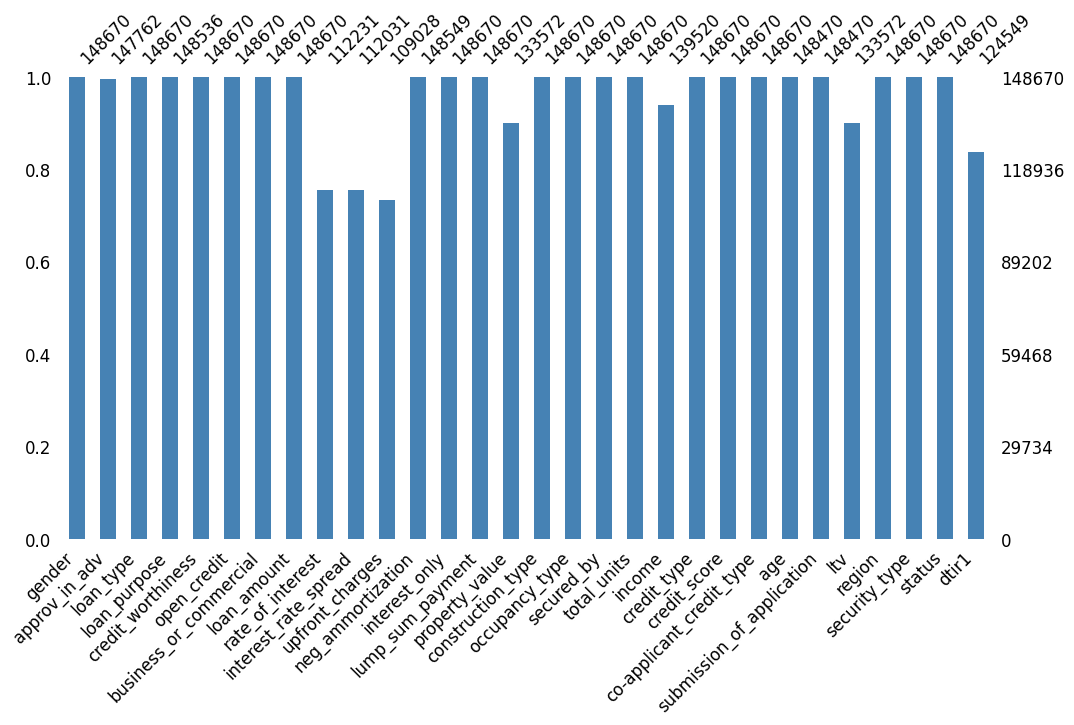

In [7]:
missing_values = loan_default.isna().sum()
msno.bar(loan_default,figsize=(12,6), fontsize = 12, color = "steelblue")


* Initialize empty lists to store **numerical** and **categorical** variables.
* Identify the data type of each column in the DataFrame and classify them as either **numerical** or **categorical**. Print out the identified numerical and categorical columns.
* This step is necessarry, as we deploy two distinict methods for imputating the missing Values.

In [8]:
numerical_vars = [] # empty list for numerical values
categorial_vars = [] #empty list for categroical values
datatypes = pd.DataFrame(loan_default.dtypes).reset_index()

for i, j, in zip(datatypes["index"], datatypes[0]): #this loop checks the datatype of every collumn and assigns it either one of the two lists
    if j == "object":
        categorial_vars.append(i)
    else:
        numerical_vars.append(i)
print(f"Those are the numerical collumns: {numerical_vars}")
print(f"Those are the categorial collumns: {categorial_vars}")

Those are the numerical collumns: ['loan_amount', 'rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'property_value', 'income', 'credit_score', 'ltv', 'dtir1']
Those are the categorial collumns: ['gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'business_or_commercial', 'neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'region', 'security_type', 'status']


### 3.1.4 Imputing Numerical Values

The **KNNImputer (K-Nearest Neighbors Imputer)** is a data imputation technique used to **fill in missing values** in a dataset based on the **values of other observations.** It leverages the K-nearest neighbors algorithm to estimate missing values **by considering the proximity of similar rows** in the dataset.

We choose, this method as it promises **better results**, compared to a basic **forward/backward fill**. Furthermore, simply dropping the collumns also wasn't viable, as some collumns where missing around **10%-15%** of their data. Meaning that dropping them could results in a **great information loss**.

In [9]:
loan_default_num = loan_default[numerical_vars] #We just use KNN-Imputer for our Numerical Values
knn_imputer = KNNImputer(n_neighbors=3) #defining the number of neighbours an observation is compared with
loan_default[numerical_vars] = knn_imputer.fit_transform(loan_default_num)
loan_default[numerical_vars].isna().sum() # checking if the imputation worked

,0
loan_amount,0
rate_of_interest,0
interest_rate_spread,0
upfront_charges,0
property_value,0
income,0
credit_score,0
ltv,0
dtir1,0


### 3.1.5 Imputing Categorical Values

This Imputation Method we use for our Categorial Data is a simple the **"most frequent"** Method. Where the most frequenet values for each collum are used to fill the collumns. We figured, that for categorial values, it was hard to build use the mean/median of values. As those values are often inbetween of the real category values.

Furthermore, we also could have ultilized the KNN-Imputer. However, we wanted to use another Imputation-Method, just for the **sake of the learning experience.**

**As a result** we can see, that there are no missing values, both for numerical and categorial collumns left. Therefore we can countiune our **EDA**

In [10]:
imputer = SimpleImputer(strategy="most_frequent")
loan_default[categorial_vars] = imputer.fit_transform(loan_default[categorial_vars])
loan_default[categorial_vars].isna().sum()

,0
gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
credit_worthiness,0
open_credit,0
business_or_commercial,0
neg_ammortization,0
interest_only,0
lump_sum_payment,0


### 3.1.6 Checking for Outliers

Plotting the boxplots helps use to visually analyse whether the **numerical variables have outliers**. Upon visual inspection, we can conclude that almost all variables are "contaminated" with outlier.

Therefore we need to **winsorize** (exclude) the outliers from our dataset

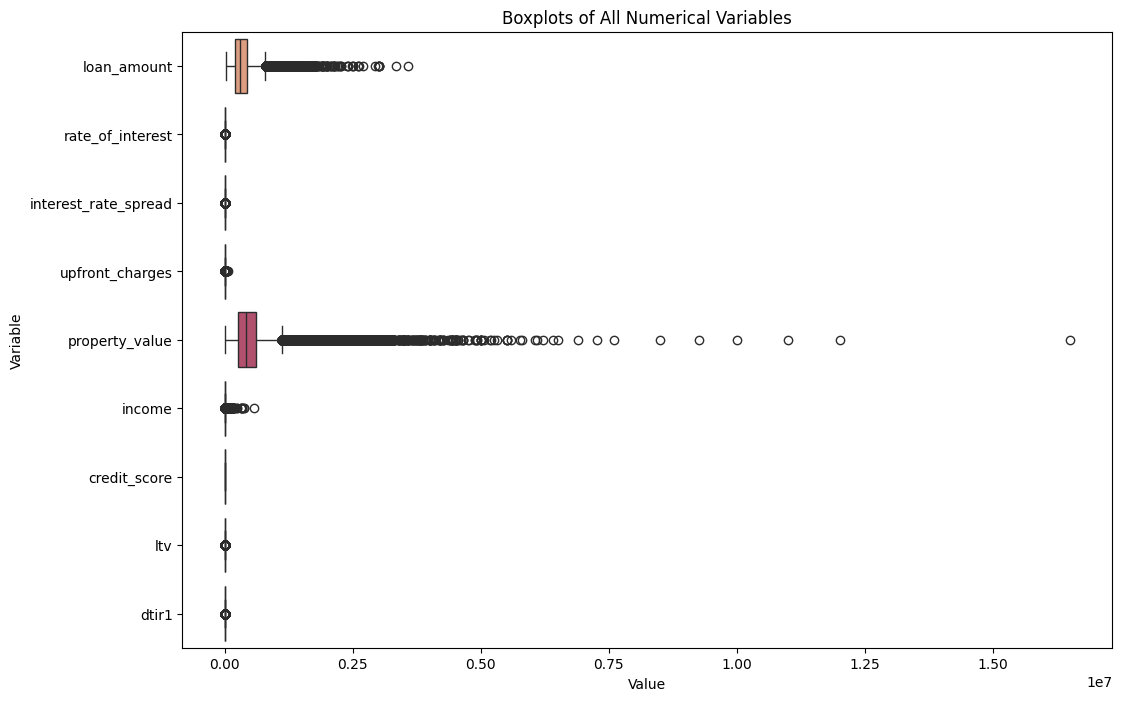

In [11]:
boxplot_df = loan_default[numerical_vars].melt(var_name='Variable', value_name='Value')

# Create a single plot with all boxplots stacked vertically
plt.figure(figsize=(12, 8))
sns.boxplot(x='Value', y='Variable', data=boxplot_df, orient='h', palette='flare')
plt.title("Boxplots of All Numerical Variables")
plt.xlabel("Value")
plt.ylabel("Variable")
plt.show()

### 3.1.7 Winsorizing

Here we are excluding out the **lowest** and **highest** **5%** of our numerical values

In [12]:
for col in numerical_vars:
  loan_default[col] = winsorize(loan_default[col], limits = (0.05, 0.05))

### 3.1.8 Standardizing

Here we use the Standard Scaler:
$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$

After standardizing the **mean** of each collumns equals **0**, whilst having a **standard deviation** of **1**

In [13]:
scaler = StandardScaler()
loan_default[numerical_vars] = scaler.fit_transform(loan_default[numerical_vars])

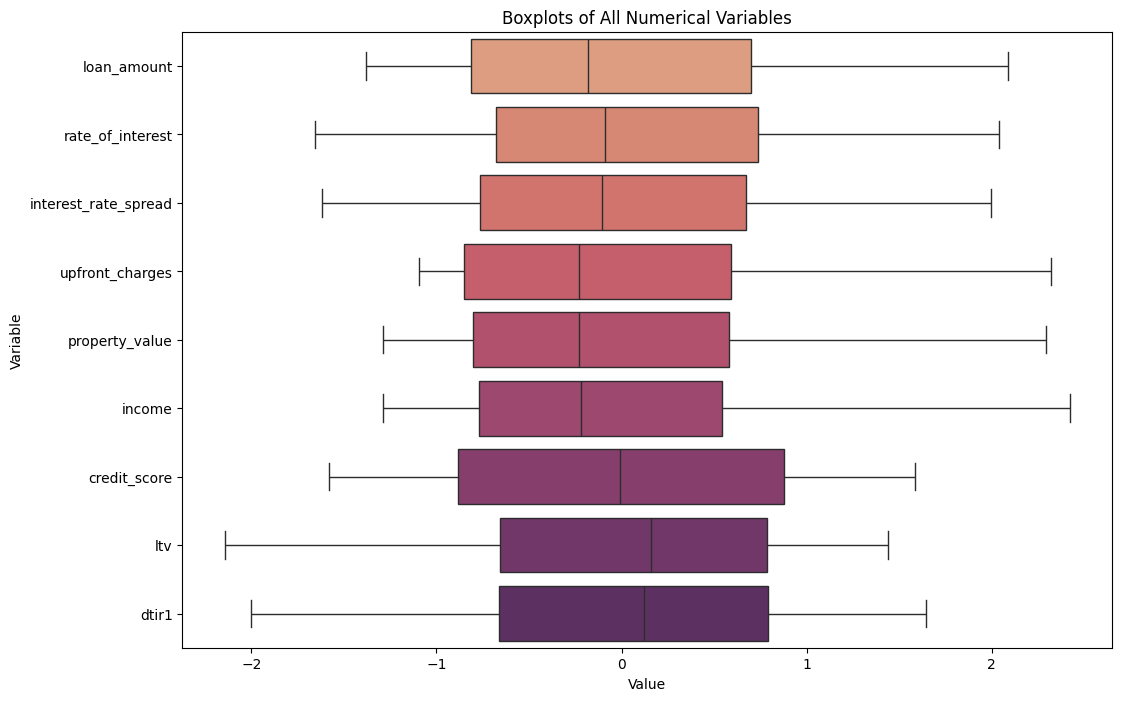

In [14]:
boxplot_df = loan_default[numerical_vars].melt(var_name='Variable', value_name='Value')

# Create a single plot with all boxplots stacked vertically
plt.figure(figsize=(12, 8))
sns.boxplot(x='Value', y='Variable', data=boxplot_df, orient='h', palette='flare')
plt.title("Boxplots of All Numerical Variables")
plt.xlabel("Value")
plt.ylabel("Variable")
plt.show()

We can see that they **boxplots** for the **numerical** **values** dont have any **outliers** anymore.

### 3.1.9 Distribution of Variables

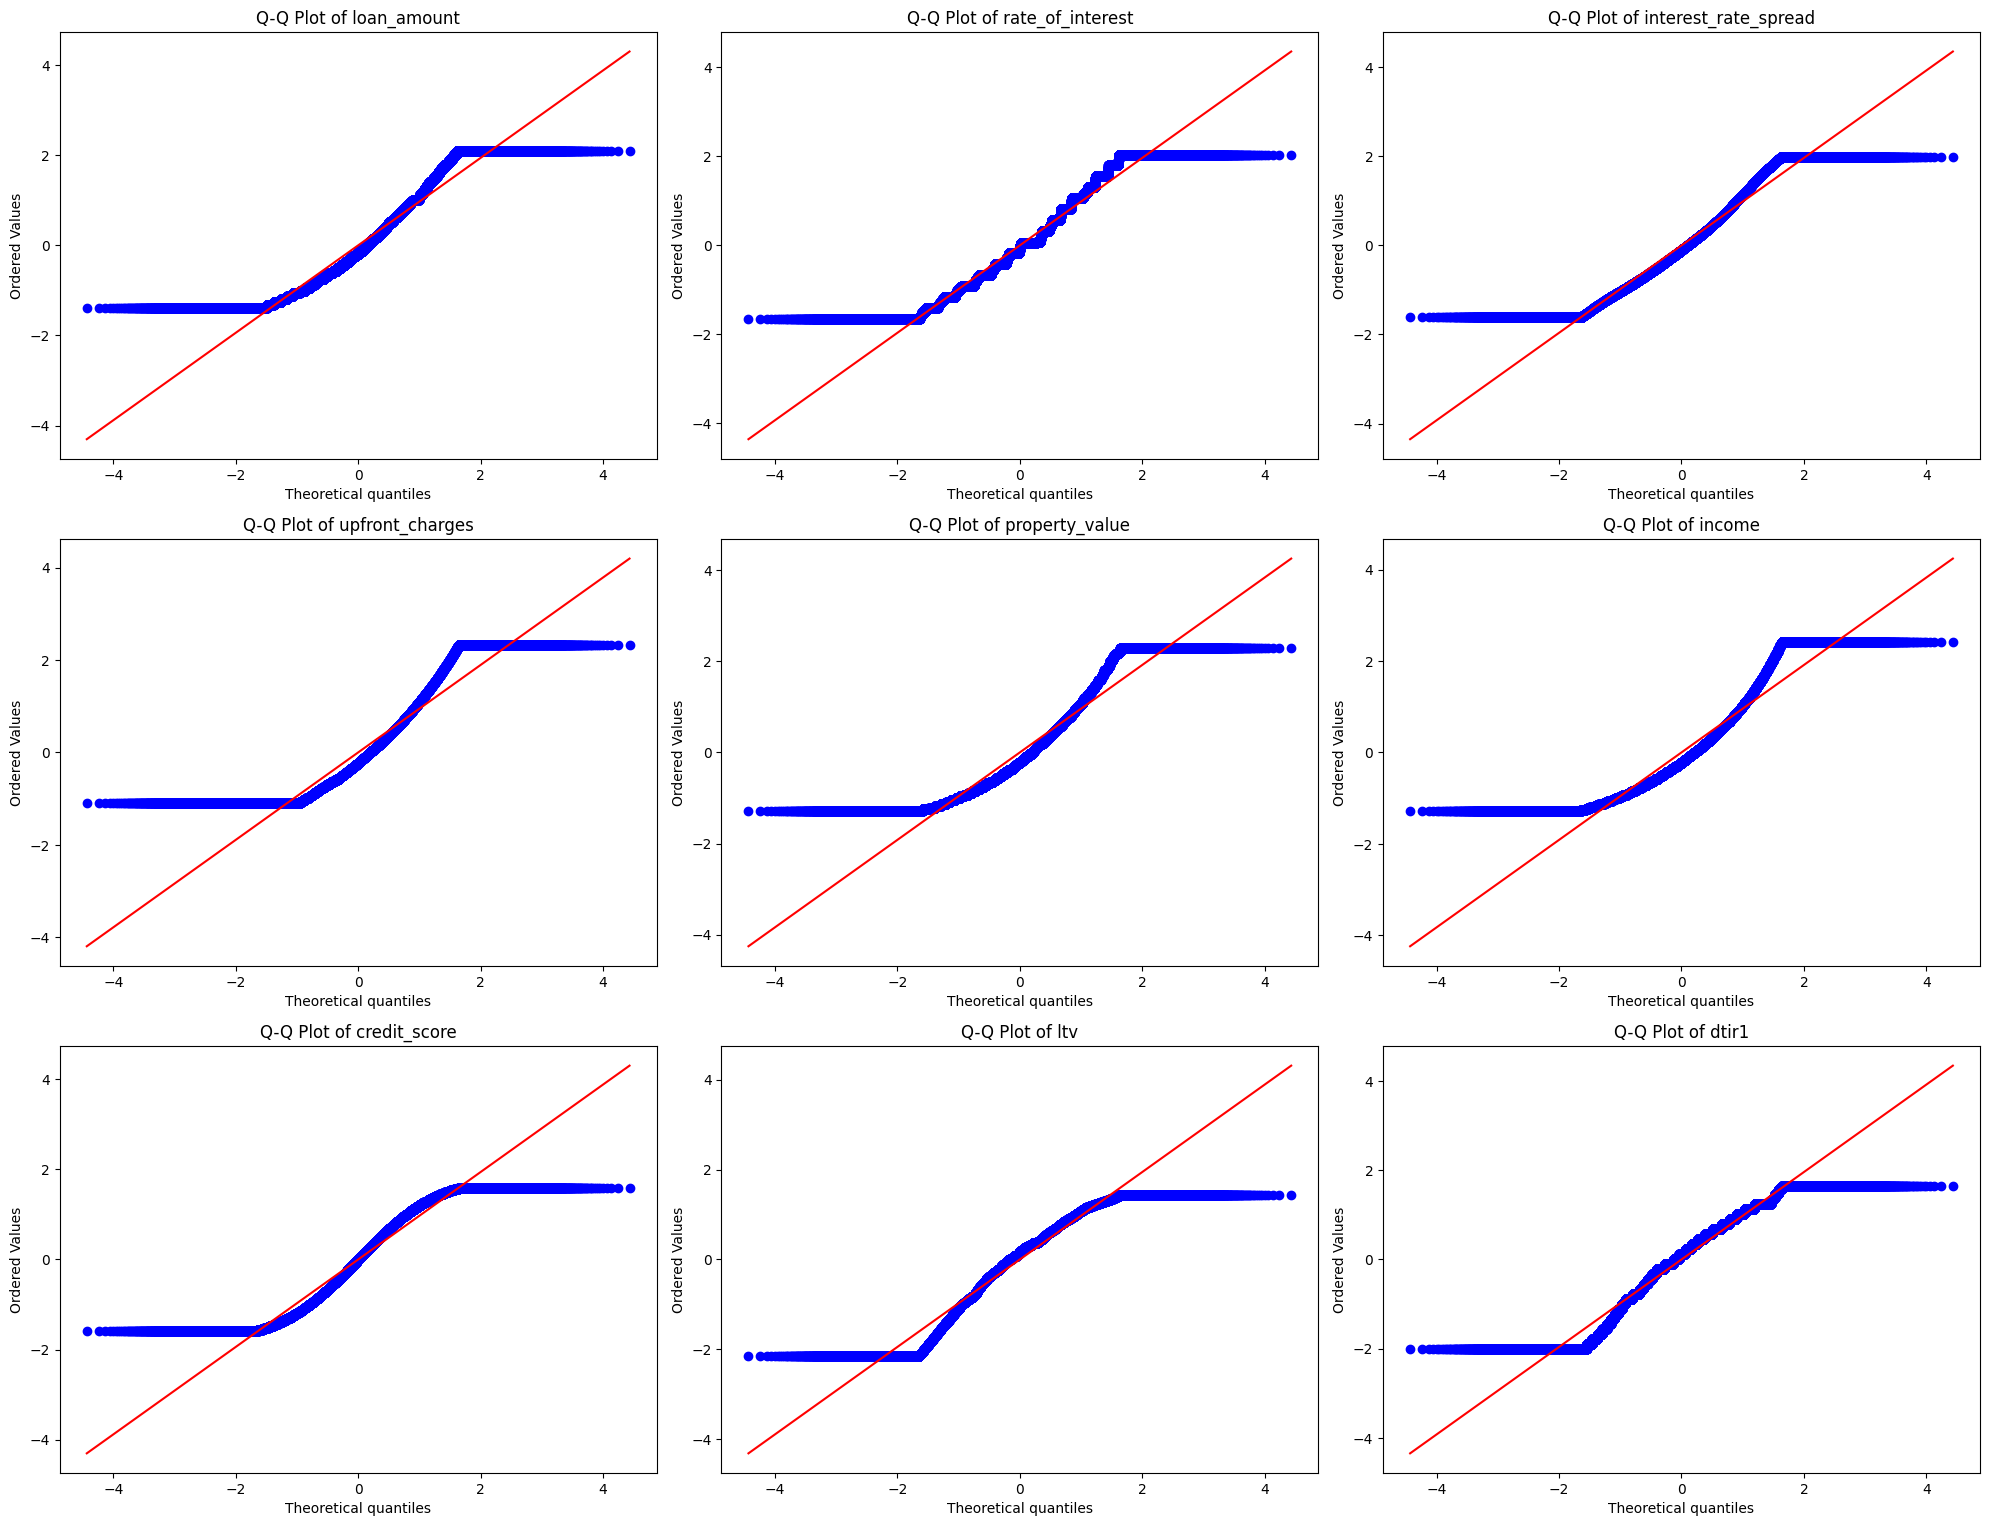

In [15]:
fig, axes = plt.subplots(nrows=(len(numerical_vars) // 3) + 1, ncols=3, figsize=(20, (len(numerical_vars) // 3 + 1) * 5))
axes = axes.flatten()  # Flatten axes for easier iteration

# Loop through each numerical variable and create a Q-Q plot
for i, var in enumerate(numerical_vars):
    stats.probplot(loan_default[var], dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot of {var}")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

 **Key Observations:**
1. **`loan_amount`**:
   - The Q-Q plot of `loan_amount` shows significant deviations from the diagonal red line at both ends, indicating the presence of outliers and heavy tails, suggesting that the distribution is not normally distributed.

2. **`rate_of_interest`**:
   - The plot for `rate_of_interest` shows a step-like pattern, reflecting that this variable may have discrete values or limited levels, deviating from a normal distribution.

3. **`interest_rate_spread`**:
   - This variable closely follows the diagonal line in the center but shows deviations at the tails, suggesting slight skewness or the presence of extreme values.

4. **`income` and `property_value`**:
   - The plots for `income` and `property_value` exhibit notable departures from the red line at the higher values, indicating positive skewness or outliers in the data.

5. **`dtir1`**:
   - The plot for `dtir1` shows some deviations at the extremes but relatively aligns with the normal distribution in the middle, suggesting moderate conformity to normality.

## 3.2 EDA for Research Question 1

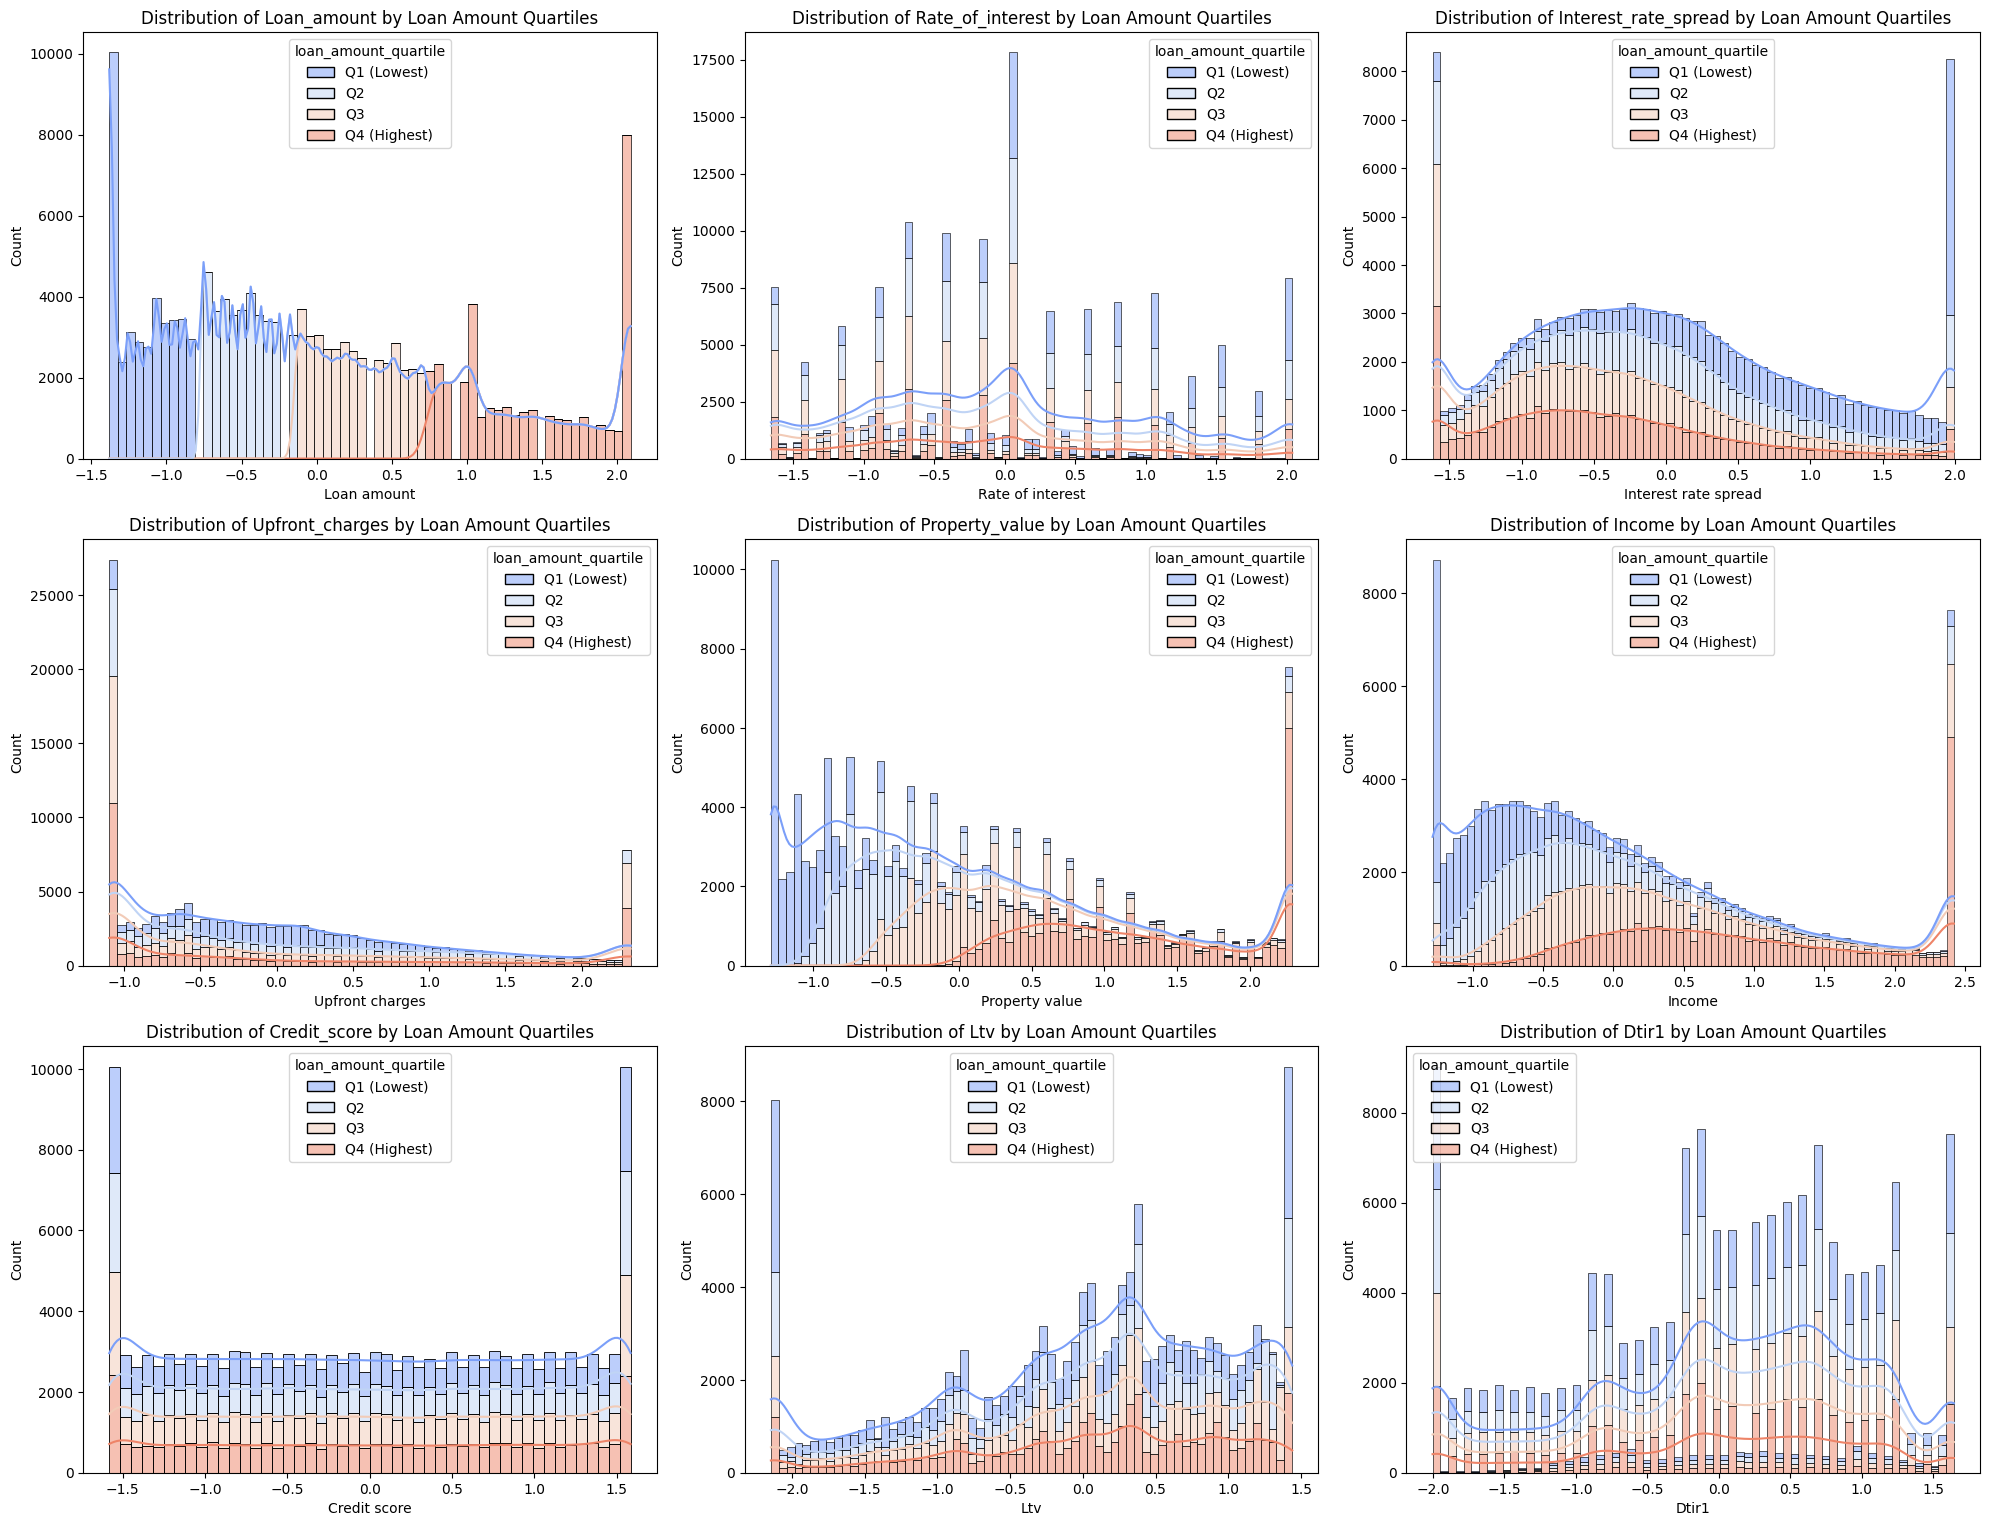

In [16]:
loan_default['loan_amount_quartile'] = pd.qcut(loan_default['loan_amount'], q=4, labels=["Q1 (Lowest)", "Q2", "Q3", "Q4 (Highest)"])

fig, axes = plt.subplots(nrows=(len(numerical_vars) // 3) + 1, ncols=3, figsize=(20, (len(numerical_vars) // 3 + 1) * 5))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each numerical variable's density distribution with respect to status
for i, col in enumerate(numerical_vars):
    sns.histplot(x=loan_default[col], hue=loan_default['loan_amount_quartile'], palette="coolwarm", kde=True, ax=axes[i], multiple='stack')
    axes[i].set_title(f'Distribution of {col.capitalize()} by Loan Amount Quartiles')
    axes[i].set_xlabel(col.capitalize().replace('_', ' '))
    axes[i].set_ylabel('Count')

# Remove any empty subplots if not needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Analysis of Factors Influencing Loan Amount**

The histograms above show the distribution of various numerical variables across different loan amount quartiles (Q1: Lowest, Q4: Highest). This visual analysis provides support for Research Question 1: *What factors influence the size of the loan amount?* The histograms help identify how the distribution of each variable shifts with changes in loan amount, giving insight into the potential impact of these variables on the loan size.

**Key Observations:**

1. **Income**:
   - The `Distribution of Income by Loan Amount Quartiles` plot indicates that higher loan amounts (Q3 and Q4) are associated with higher income levels. As the income increases, the count of loans in the higher quartiles rises, supporting the hypothesis that income is positively related to loan amount.

2. **Property Value**:
   - The `Distribution of Property Value by Loan Amount Quartiles` plot shows a clear relationship between property value and loan amount. Higher property values are more prevalent in higher loan amount quartiles (Q3 and Q4). This suggests that larger properties often require larger loans, making property value a significant factor influencing loan amount.

3. **Interest Rate Spread**:
   - The `Distribution of Interest Rate Spread by Loan Amount Quartiles` plot suggests that lower loan amounts (Q1) tend to have higher interest rate spreads. As the loan amount increases, the spread generally decreases, indicating that higher loan amounts are perceived as less risky by lenders and may receive more favorable interest rates.

4. **Debt-to-Income Ratio (`dtir1`)**:
   - The `Distribution of Dtir1 by Loan Amount Quartiles` plot shows that higher debt-to-income ratios are more common in the lower loan amount quartiles. As the loan amount increases, the debt-to-income ratio decreases, indicating that a healthier debt profile is associated with larger loans.

5. **Credit Score (`credit_score`):**
  - We can see that the credit score doesnt significantly influence the loan amount. However, as for our perception this seemed a bit unsual, as it is commonly known that a credit score is important for getting a loan. To dig deeper in this anomality we still included it.




### 3.2.1 Correlation Matrix

Text(0.5, 1.0, 'Correlation Heatmap')

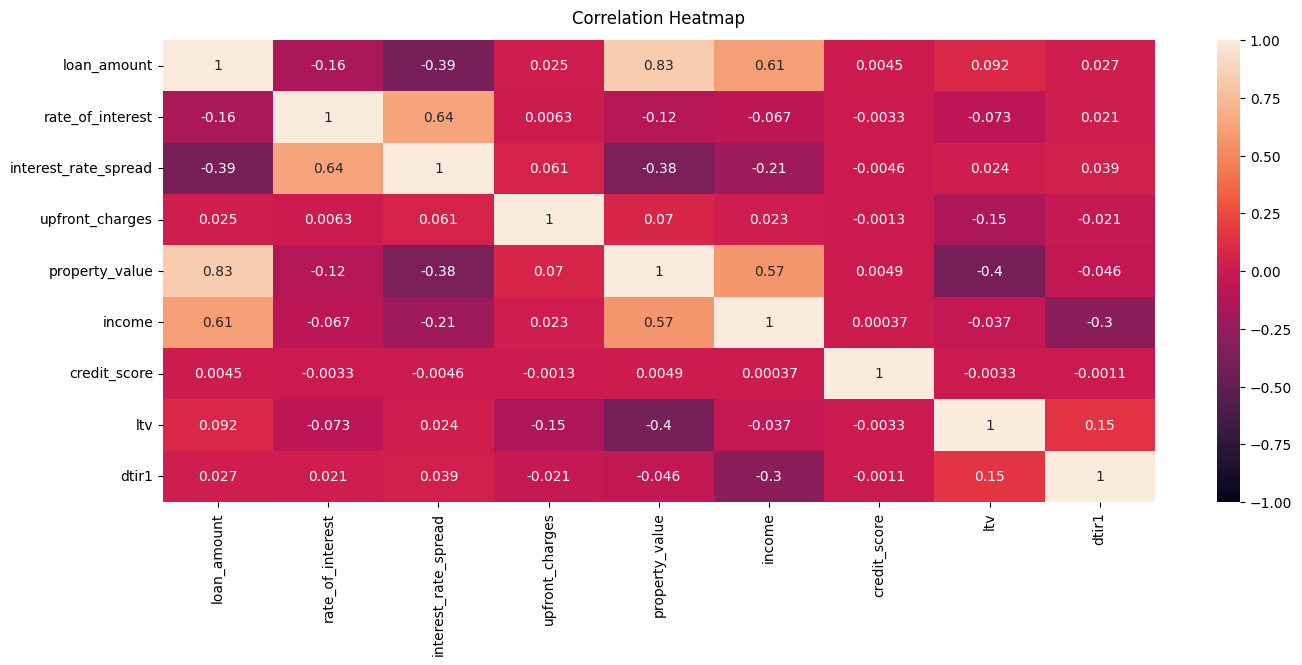

In [17]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(loan_default[numerical_vars].corr(),vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

The correlation heatmap illustrates the relationships between numerical variables, providing support for our research questions:

**Research Question 1**: *What factors influence the size of the loan amount?*
   - `loan_amount` has a strong positive correlation with both `property_value` (0.83) and `income` (0.61), suggesting that higher property values and incomes are key factors influencing larger loan amounts.
   - `interest_rate_spread` shows a moderate negative correlation with `loan_amount` (-0.39), indicating that higher risk (measured by the spread) might limit the loan amount.


## 3.3 EDA for Research Question 2

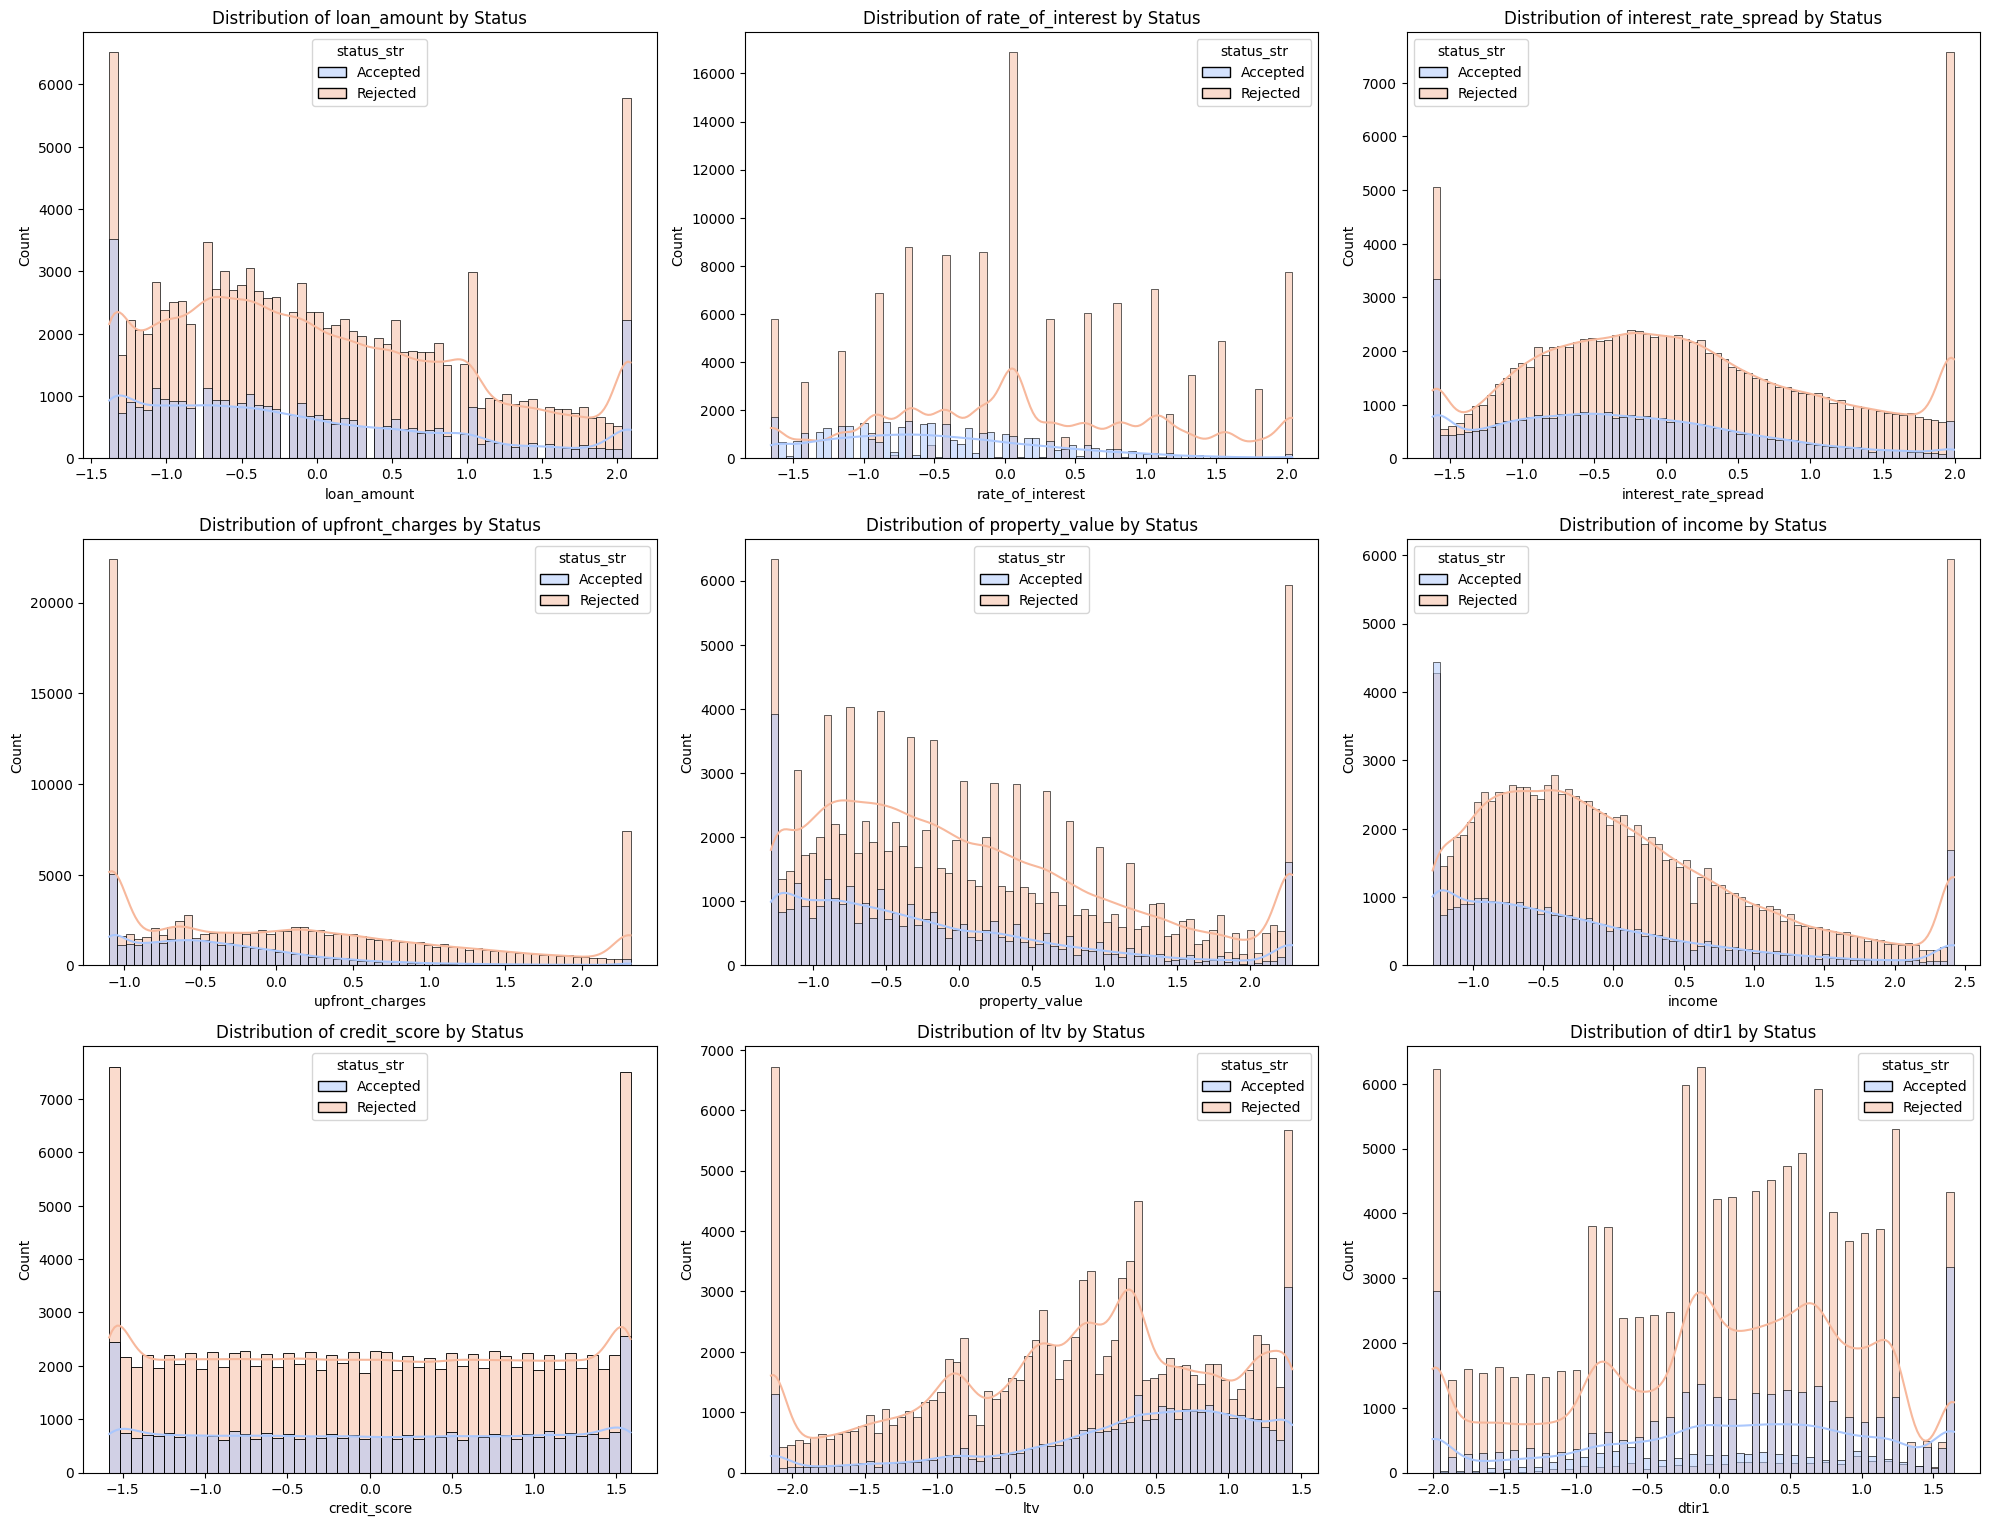

In [18]:
loan_default['status_str'] = loan_default['status'].map({0: 'Rejected', 1: 'Accepted'})

fig, axes = plt.subplots(nrows=(len(numerical_vars) // 3) + 1, ncols=3, figsize=(20, (len(numerical_vars) // 3 + 1) * 5))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each numerical variable's density distribution with respect to status
for i, col in enumerate(numerical_vars):
    sns.histplot(data=loan_default, x=col, hue='status_str', multiple='layer', palette="coolwarm", ax=axes[i], kde=True)
    axes[i].set_title(f"Distribution of {col} by Status")
    axes[i].set_xlabel(col)  # Set the x-axis label as the column name
    axes[i].set_ylabel("Count")  # Set the y-axis label


# Remove any empty subplots if not needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Analysis of Factors Influencing Loan Status**

**Research Question 2**: *What factors influence the size of the loan amount?*

The chosen variables are also relevant for predicting loan approval. The plots provide visual evidence of the distribution of accepted and rejected loans, highlighting the role of each variable in determining loan status.

1. **Credit Score (`credit_score`)**:
   - We can see that the credit score doesnt significantly influence the loan amount. However, as for our perception this seemed a bit unsual, as it is commonly known that a credit score is important for getting a loan. To dig deeper in this anomality we still included it.

2. **Income (`income`)**:
   - The `Distribution of income by Status` plot suggests that higher income levels are more common among accepted loans. This supports the hypothesis that higher income is positively related to loan approval.

3. **Loan-to-Value Ratio (`ltv`)**:
   - The `Distribution of ltv by Status` plot shows that accepted loans generally have a lower LTV ratio. A lower LTV ratio indicates a lower risk for the lender, making it a significant factor in determining whether a loan is approved or rejected.

4. **Debt-to-Income Ratio (`dtir1`)**:
   - As depicted in the `Distribution of dtir1 by Status` plot, loans with lower debt-to-income ratios are more likely to be accepted. This suggests that a healthier financial position is associated with higher chances of loan approval.

5. **Interest Rate Spread (`interest_rate_spread`)**:
   - The `Distribution of interest_rate_spread by Status` plot highlights that loans with a higher interest rate spread are more likely to be rejected, indicating that the perceived risk (reflected in the spread) plays a role in predicting loan approval.
  
6. **Loan Amount (`loan_amount`)**:
   - The `Distribution of loan_amount by Status` plot highlights that loans with a higher loan amounts are more likely to be rejected





### 3.4 EDA for Categorical Values

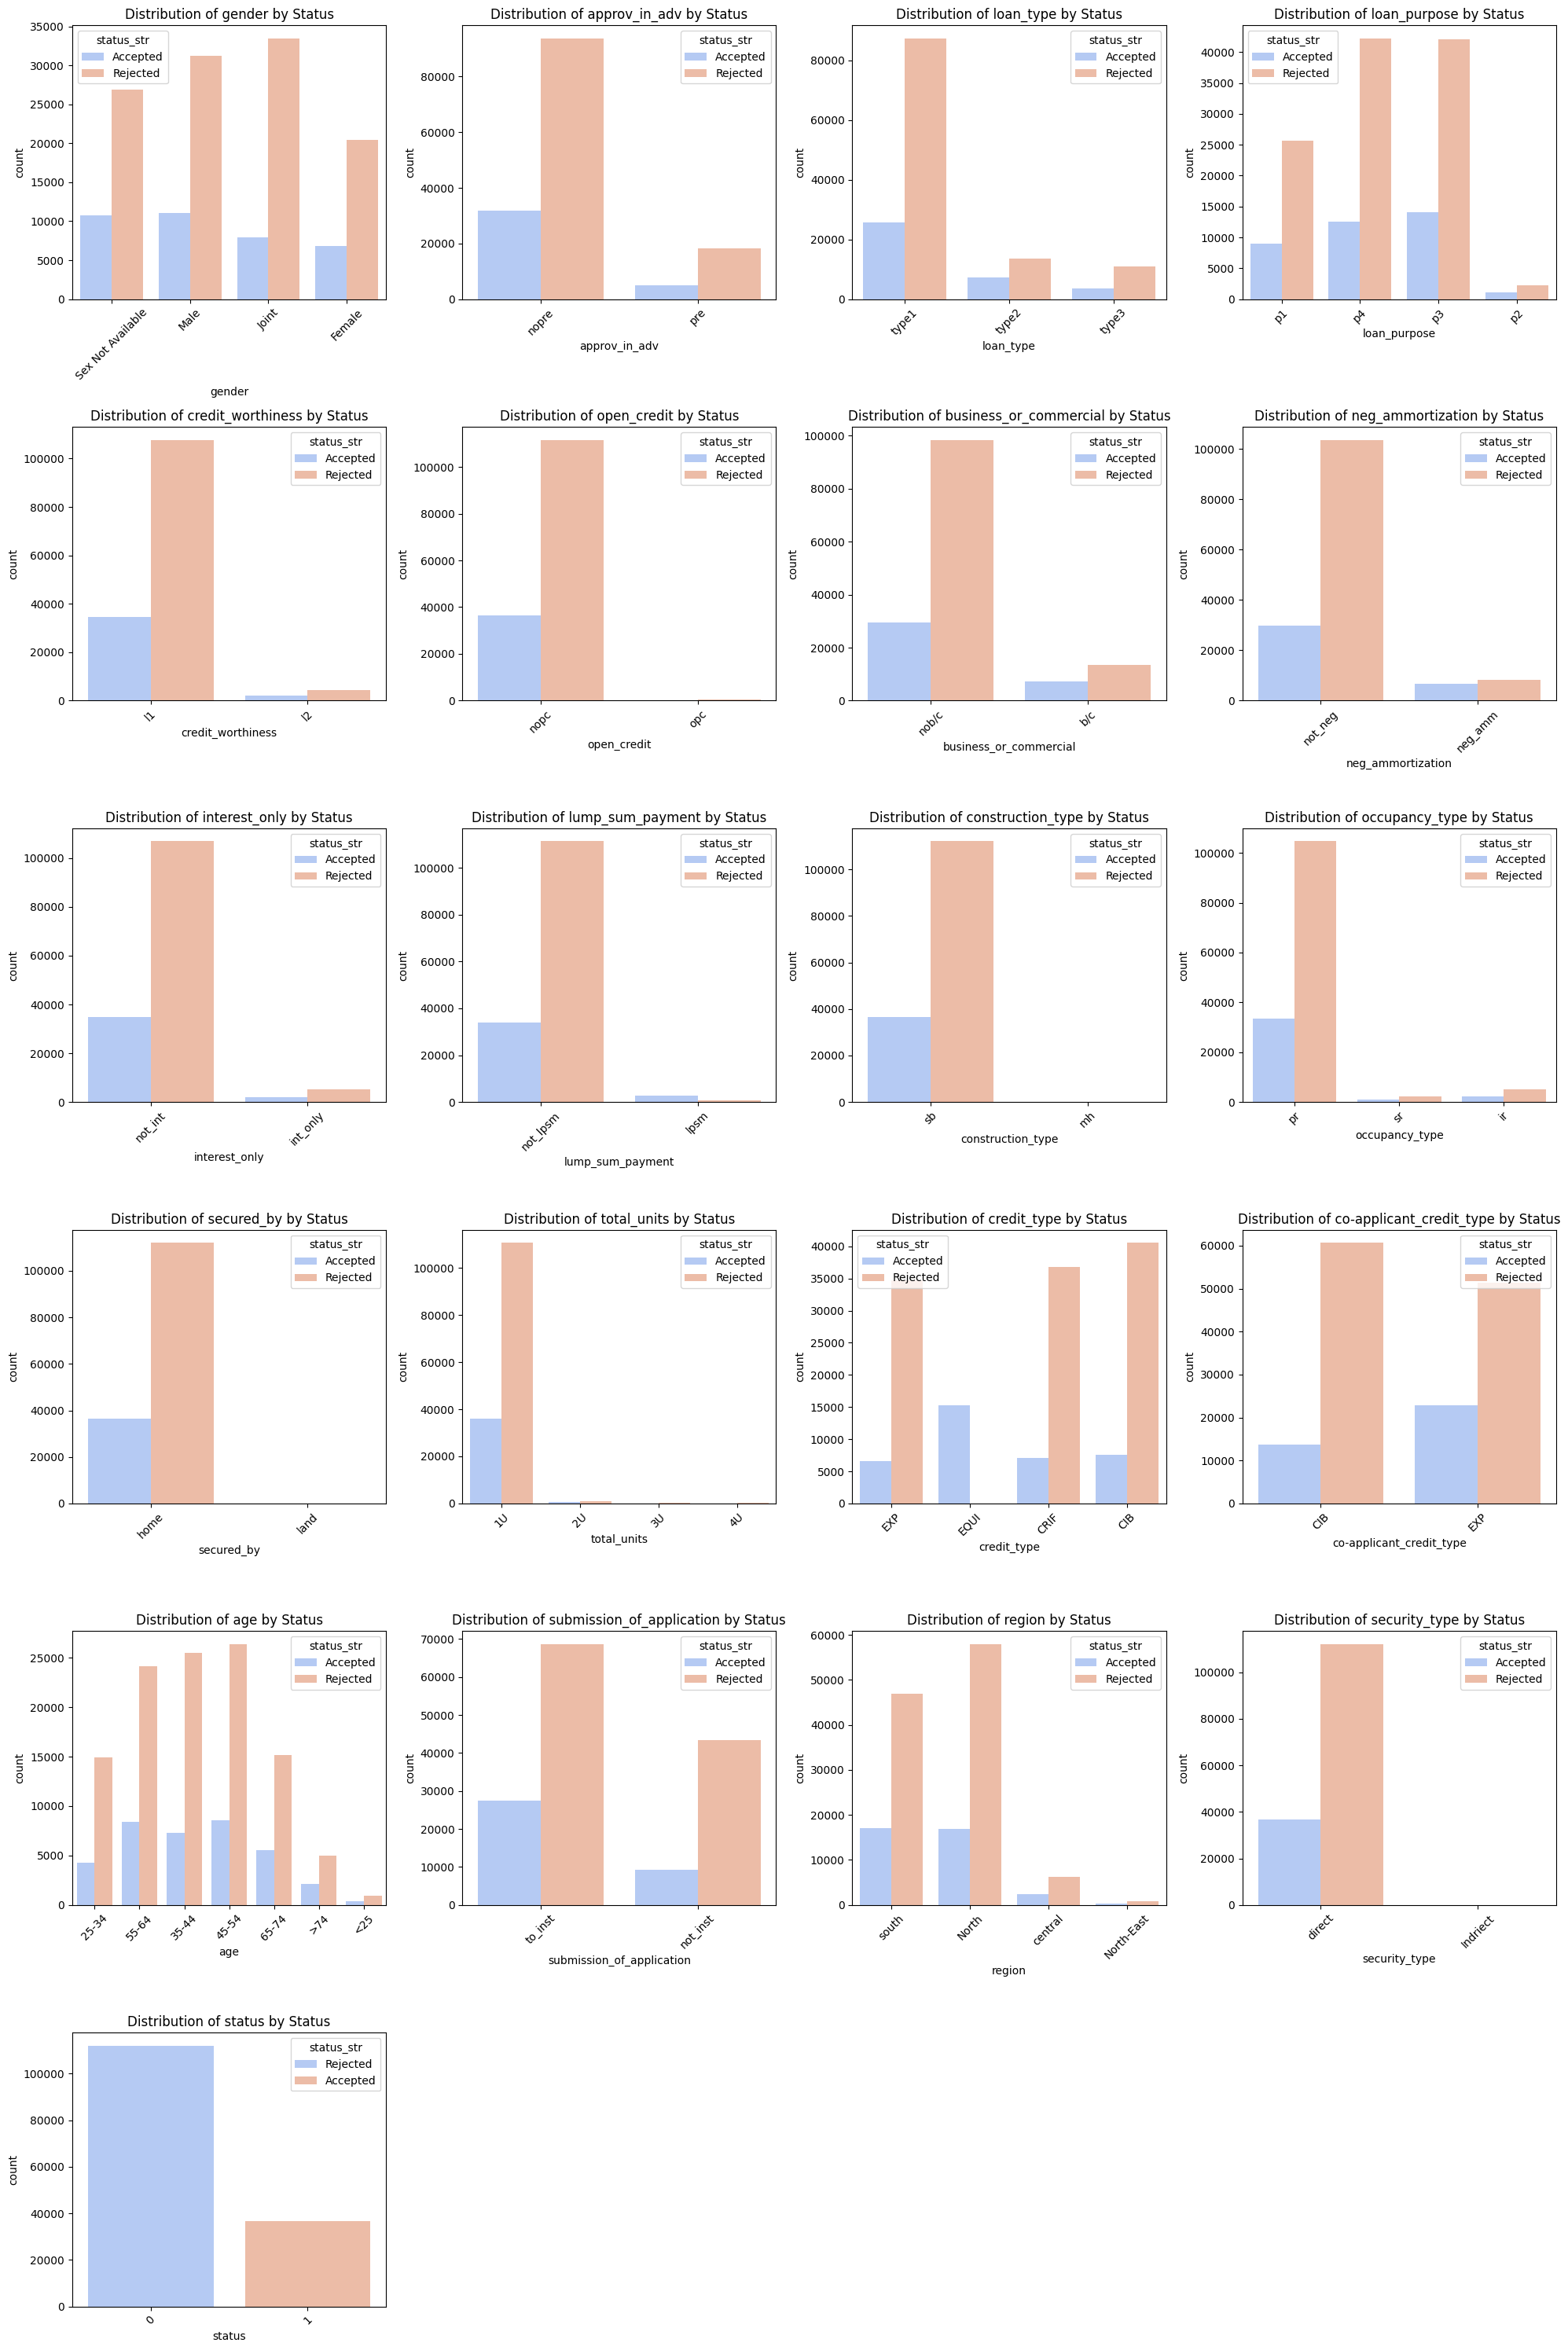

In [19]:
# Create subplots based on the number of categorical variables
fig, axes = plt.subplots(nrows=(len(categorial_vars) // 4) + 1, ncols=4, figsize=(20, (len(categorial_vars) // 4 + 1) * 5))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each categorical variable and plot the countplot separated by status
for i, col in enumerate(categorial_vars):
    sns.countplot(x=col, data=loan_default, hue='status_str', palette="coolwarm", ax=axes[i])  # Use status as hue
    axes[i].set_title(f"Distribution of {col} by Status")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove any empty subplots if not needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


**Key Insights from Categorical Variables**

1. **Credit Worthiness**:
   - Borrowers classified as "Not Available" or "Default" in the `credit_worthiness` category have a significantly higher rejection rate compared to those marked as "Good."
   - This indicates that credit worthiness is a strong indicator of whether a loan will be approved or rejected. Loans for borrowers with good credit worthiness are far more likely to be accepted.

2. **Loan Purpose**:
   - The count plot for `loan_purpose` shows that loans with purposes categorized as "p1" (likely primary residence or investment) have a much higher acceptance rate compared to other categories like "p3" or "p4."
   - This suggests that lenders are more willing to approve loans for specific purposes, possibly due to lower associated risk.

3. **Business or Commercial Use**:
   - Loans intended for business or commercial use have a markedly lower acceptance rate compared to those not for business purposes.
   - This pattern indicates that lenders are more cautious when approving loans for commercial purposes, potentially due to higher perceived risk.

4. **Region**:
   - The distribution of loans by `region` shows that some regions (e.g., "South") have a higher number of accepted loans compared to others (e.g., "North" and "Central").
   - This could be due to regional economic conditions, borrower profiles, or other demographic factors that influence loan approval rates.

5. **Submission of Application**:
   - The `submission_of_application` variable reveals that applications submitted to institutions (e.g., "to_inst") have a higher approval rate than those not submitted to institutions.
   - This might indicate that applications submitted through formal channels are more likely to be accepted, possibly due to better documentation or assessment criteria.

**Reasons for Excluding Categorical Variables from the Final Model**

Despite their potential relevance, we excluded categorical variables from the final model for the following reasons:

1. **Model Complexity**:
   - Including categorical variables would require additional preprocessing steps (e.g., one-hot encoding), which could significantly increase model complexity and result in a larger number of features.

2. **Risk of Multicollinearity**:
   - Some categorical variables may introduce multicollinearity, where two or more variables are highly correlated. This could reduce the interpretability and stability of the model.


# 4. Research Question 1: Linear Regression

## 4.1 Linear Regression

In [20]:
loan_default["income_sqr"] = loan_default["income"] ** 2 # see Section 5.2
loan_default["property_value_sqr"]=loan_default["property_value"] ** 2

#Initiating the Linear Regression Model
model = smf.ols(formula= 'loan_amount ~ income + property_value + interest_rate_spread + dtir1 + income_sqr + property_value_sqr + credit_score', data=loan_default)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 7.035e+04
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:33:40   Log-Likelihood:            -1.0231e+05
No. Observations:              148670   AIC:                         2.046e+05
Df Residuals:                  148662   BIC:                         2.047e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1901 

With this **OLS regression summary** we can reach some initial interpretations:

**R-Squared and Adjusted R-Squared**

- R-squared is 0.768, which means approximately 77% of the variability in loan amounts is explained by the predictors in the model;
- Adjusted R-squared is 0.768, similar to R-squared, indicates the model fits the data well, adjusting for the number of predictors;

**F-statistic and Prob**
- F-statistic is 7.035e+04, with a p-value (Prob > F) of 0.00, meaning the overall model is statistically significant;

**Coefficients**
- **Intercept (`intercept`)**: 0.01901, meaning when all standardized predictors are at their mean value of zero, the expected standardized base loan amount starts at approximately 0.01901 standard deviations above the mean.

- **Income (`income`)**: 0.2861 (highly significant), indicating that for each standard deviation increase in income, the loan amount is expected to increase by 0.2861 standard devations; holding other variables constant.

- **Property Value (`property_value`)**: 0.7756 (significant),indicating that for each standard deviation increase in property value, the loan amount is expected to increase by 0.7756 standard deviations, holding other variables constant.

- **Interest Rate spread (`interest_rate_spread`)**: -0.0585 (significant), indicating that for each standard deviation increase in the interest rate spread, the loan amount is expeceted to decrease by -0.0585 standard deviations, holding other variables constant.

- **Debt-to-Income Ratio(`DTI`)** : 0.1258 (significant), for each standard deviation increase in DTI, the loan_amount is expected to increase by 0.1339 standard deviations, holding all other variables constant.

- **Income Squared (`income_sqr`)** : -0.0531 (significant), For each standard deviation increase in income_sqr, the loan_amount is expected to decrease by 0.0954 standard deviations, holding other variables constant.

- **Credit Score (`credit_score`)**: The coefficient of 0.0004 is not statistically significant (p-value = 0.731), indicating that for each standard deviation increase in credit_score, there is no meaningful change in loan_amount. This suggests that credit_score does not have a strong impact on loan amount in this model.

- **Property Value Sqaured (`property_value_sqr`)**: -0.1370 (significant), for each standard deviation increase in property_value_sqr, the loan_amount is expected to decrease by 0.1370 standard deviations, holding other variables constant.



**Statistical Tests**
- **Omnibus** and **Jarque-Bera** tests show that residuals are not normally distributed;
- **Durbin-Watson** value of 2.009 indicates no significant autocorrelation in the residuals;
- **Kurtosis** and **Skewness** suggest a deviation from normality.

## 4.2 Predicting

In [21]:
# Making predictions
loan_default['predictions'] = results.predict(loan_default)
loan_default['residuals'] = loan_default['loan_amount'] - loan_default['predictions']
# Show the first rows of the DataFrame with predictions and residuals
print(loan_default[['loan_amount', 'predictions', 'residuals']].head())

   loan_amount  predictions  residuals
0    -1.318012    -1.343250   0.025238
1    -0.750101    -0.728918  -0.021183
2     0.511924     0.656071  -0.144147
3     0.827430     1.042347  -0.214917
4     2.089455     1.192273   0.897182


Text(0.5, 1.0, 'Actual vs. Predicted')

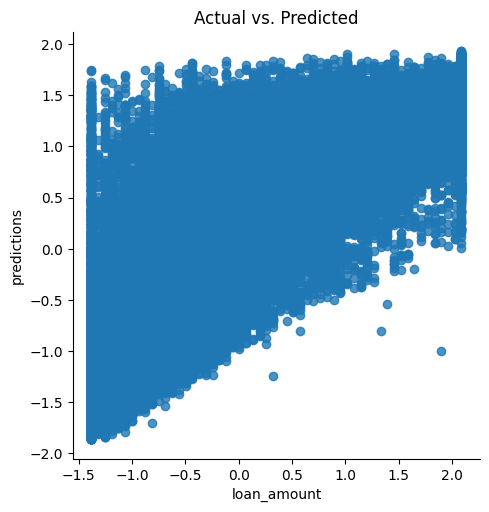

In [22]:
# Plotting the actual vs predicted values
sns.lmplot(x='loan_amount', y='predictions', data=loan_default, fit_reg=False)
plt.title('Actual vs. Predicted')

This plot displays a comparison between the actual loan amounts and the predicted loan amounts from the model

- There is a general upward trend, indicating that as the actual loan amounts increase, the predicted loan amounts also tend to increase. This suggests that the model is capturing the overall relationship between the variables fairly well;
- There is noticeable spread in the data points, especially for larger loan amounts, which means that the model's predictions are not always close to the actual values;

Regarding **linearity**, this plot shows that the relationship between the actual loan amounts and the predicted loan amounts is generally linear, as indicated by the upward trend.

In [23]:
print(f"  Max prediction: {loan_default['predictions'].max()}")
print(f"  Max loan_amount in sample: {loan_default['loan_amount'].max()}")

  Max prediction: 1.9307830450582726
  Max loan_amount in sample: 2.0894548171204717


- The maximum value of the** predicted loan amounts** (1.93) is less than the** maximum value of the actual loan amounts **(2.09). This suggests that the model is underestimating the maximum loan amount, as it is not predicting values that reach the highest observed levels, by 0.16 standard deviations



## 4.3 Homescedasticity

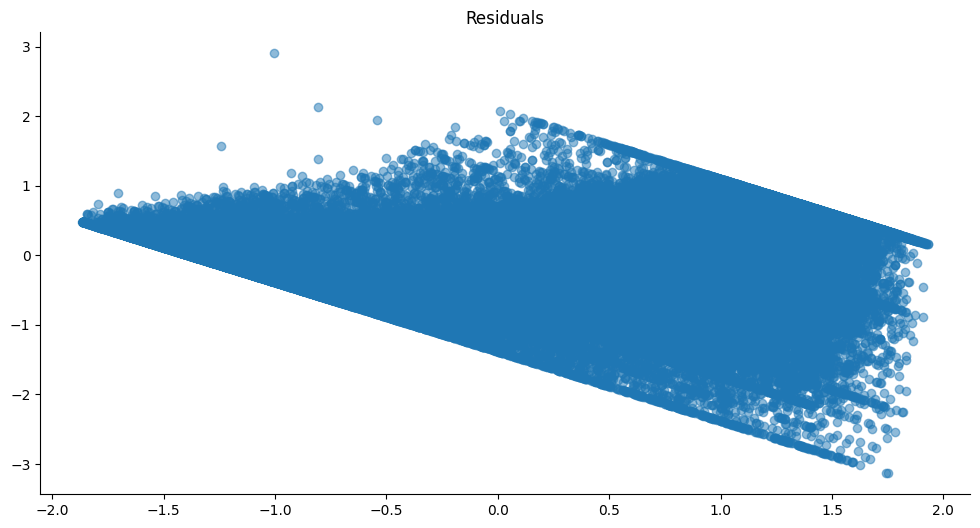

In [24]:
# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=loan_default.predictions, y=loan_default.residuals, alpha=0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()

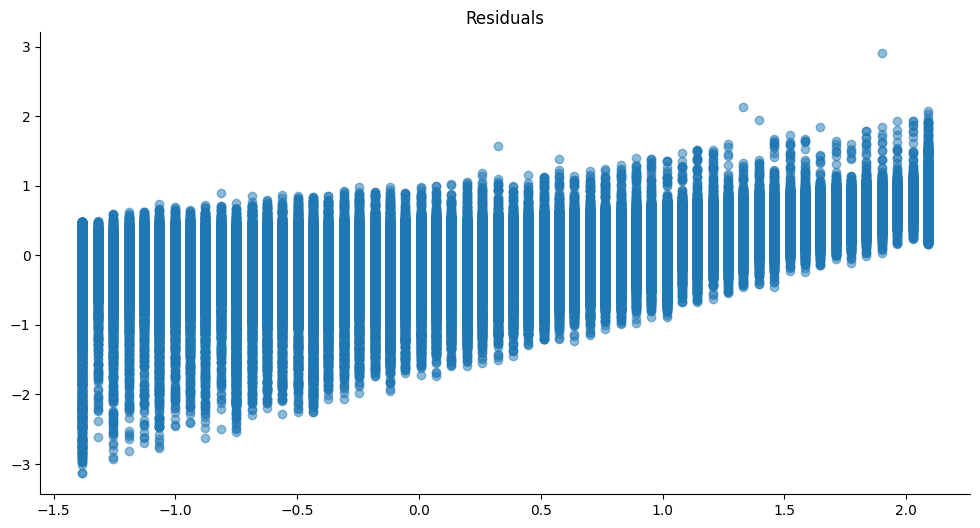

In [25]:
# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=loan_default.loan_amount, y=loan_default.residuals, alpha=0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()

In the first plot, we need to look for patterns to diagnose whether the residuals are **homoscedastic**. Ideally, the residuals should be randomly scattered around zero without any specific pattern.
However, in this case, there appears to be a funnel shape where the residuals seem more dispersed as the predicted values increase, thus indicating **heteroscedasticity**. This suggests that the variance of the errors increases with larger loan amounts. This violation of homoscedasticity means that the model does not fulfill one of the core assumptions of the **Gauss-Markov theorem**, meaning they do not provide the Best Linear Unbiased Estimator (**BLUE**).

In the second plot, we can see a roughly increasing trend between the actual loan amounts and the predicted values. However, the spread of points, particularly at higher loan amounts, is large, suggesting that the model's predictions deviate significantly from the actual values for larger loans. This spread indicates that the model is struggling with predictions for larger values, suggesting issues with efficiency and potentially biased standard errors.

Based on these two plots, the initial model violates the Gauss-Markov assumptions, particularly due to heteroscedasticity, meaning it does not qualify for the Best Linear Unbiased Estimator (BLUE). This suggests that further transformation or adjustment is needed to meet the assumptions. As so, it was decided to do a **log transformation**.

## 4.4 Log Transformation

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


                            OLS Regression Results                            
Dep. Variable:        log_loan_amount   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                 3.740e+04
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:33:44   Log-Likelihood:                -93602.
No. Observations:              120169   AIC:                         1.872e+05
Df Residuals:                  120161   BIC:                         1.873e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0300 

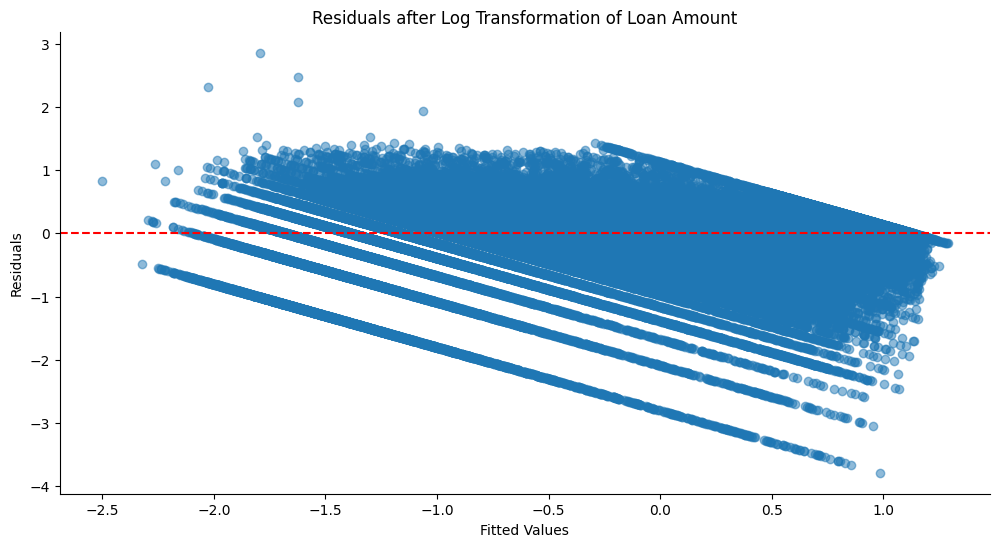

In [26]:
loan_default = loan_default.copy()
#logarithmic transformation
loan_default.loc[:, 'log_loan_amount'] = np.log(loan_default['loan_amount'] + 1)

#Regression model
model = smf.ols(formula='log_loan_amount ~ income + income_sqr + property_value + property_value_sqr + credit_score + interest_rate_spread + dtir1 ', data=loan_default)
results = model.fit()
print(results.summary())

# Calculate predictions e and residuals
loan_default.loc[:, 'log_predictions'] = results.fittedvalues
loan_default.loc[:, 'log_residuals'] = results.resid

# Plot the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # Remove spines
plt.scatter(x=loan_default['log_predictions'], y=loan_default['log_residuals'], alpha=0.5)
ax.spines['right'].set_visible(False)  # Remove the right spine
ax.spines['top'].set_visible(False)  # Remove the top spine
plt.title('Residuals after Log Transformation of Loan Amount')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

After doing the log transformation we can see that the **R-Squared decreased** to 0.647 meaning that about 65% of the variance in the log-transformed loan amount is explained by the independent variables in the model because the dependent variable is now in log scale. This transformation changes the relationship between the dependent and independent variables, and although the R-squared decreases, the model's predictions may become more accurate and reliable due to correcting for heteroscedasticity.

After the log transformation we can do a new and better interpretation of the coefficients, because we are in the log-transformed scale, a 1-unit increase in an independent variable corresponds to a percentage change in the dependent variable:

- **Income (`income`)**: 0.3108 (significant, p < 0.05)
A one-unit increase in income is associated with a 31.08% increase in the loan amount, holding all other variables constant. Since the dependent variable is logged, the coefficient represents the approximate percentage change

- **Property Value (`property_value`)**: 0.0222 (significant, p < 0.05)
A one-unit increase in property_value is associated with a 2.22% increase in the loan amount, holding all other variables constant. This is a substantial effect, indicating that property value has a strong positive influence on the loan amount.

- **Credit Score (`credit_score`)**: 0.0003 (not significant, p = 0.818)
The coefficient for credit_score is small and not statistically significant (p-value > 0.05), indicating that credit score does not have a significant impact on the loan amount in this model.

- **Interest Rate Spread (`interest_rate_spread)**:  -0.0564 (significant, p < 0.05)
A one-unit increase in interest_rate_spread is associated with a 5.64% decrease in the loan amount, holding all other variables constant. This negative relationship indicates that higher interest rate spreads lead to smaller loan amounts

- **Debt-to-Income Ratio (`DTIR1`)**: 0.1269 (significant, p < 0.05)
A one-unit increase in DTI (Debt-to-Income Ratio) is associated with a 12.69% increase in the loan amount, holding other variables constant. This indicates that higher DTI ratios are positively associated with loan amounts.

- **Income Squared (`income^2`)**: -0.094 (significant, p < 0.05)
 A one-unit increase in income_sqr (income squared) leads to a 9.40% decrease in the loan amount, holding other variables constant. This suggests that the relationship between income and loan amount is non-linear, with diminishing returns at higher income levels.

- **Property Value Squared(`property_value^2`)**: -0.5560 (significant, p < 0.05)
A one-unit increase in property_value_sqr (property value squared) results in a 55.60% decrease in the loan amount, holding other variables constant. This also suggests a non-linear relationship, where very high property values reduce the rate of loan amount increase.



Also, after applying the log transformation to the dependent variable, the residuals plot shows a significant improvement. The residuals are more evenly scattered around zero, and the funnel shape is no longer present. This indicates that **homoscedasticity** has been largely restored.

The log-transformed model corrects the heteroscedasticity problem observed in the initial model. The residuals plot now shows random scatter and constant variance, indicating that this model **fulfills the assumptions of the Gauss-Markov theorem** and therefore qualifies as providing the Best Linear Unbiased Estimator (BLUE).

## 4.5 Heteroscedasticity Robust Standard Errors
We can try to improve the model by adressing the Robust Standard Errors. The HC3 computes a heteroscedasticity robust covariance matrix and uses this matrix for the estimation.

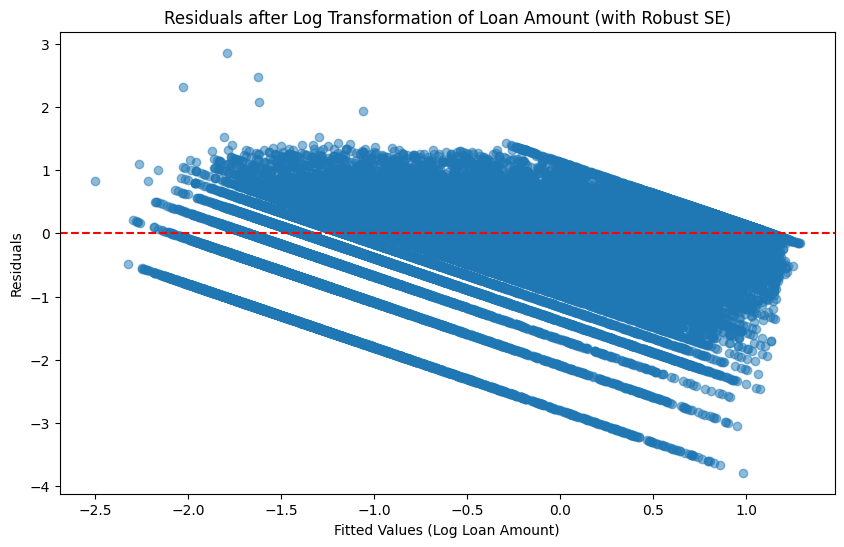

In [27]:
model = smf.ols(formula= 'log_loan_amount ~ income + income_sqr + property_value + property_value_sqr + credit_score + interest_rate_spread + dtir1', data=loan_default)
results = model.fit(cov_type = "HC3")

loan_default['log_predictions'] = results.fittedvalues
loan_default['log_residuals'] = results.resid
plt.figure(figsize=(10, 6))
plt.scatter(loan_default['log_predictions'], loan_default['log_residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals after Log Transformation of Loan Amount (with Robust SE)')
plt.xlabel('Fitted Values (Log Loan Amount)')
plt.ylabel('Residuals')
plt.show()

As we can see in the plot, the **Robust Standard Errors** does not show significant improvement beyond what was achieved with the log transformation alone. While the log transformation effectively addressed heteroscedasticity and reduced the funnel shape in the residuals, the inclusion of robust standard errors has not further enhanced the scatter pattern or distribution of the residuals.

## 4.6 QQ-Plot Normality Plot

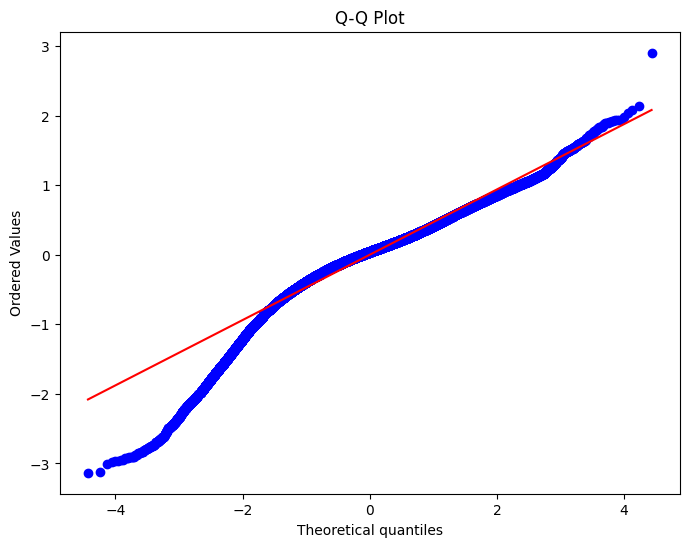

In [28]:
# Q-Q plot for normality
plt.figure(figsize=(8, 6))
stats.probplot(loan_default['residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In an ideal scenario where residuals are normally distributed, the points should fall along the red diagonal line.
At the tails, there are noticeable deviations from the red line. This indicates that the residuals deviate from normality at the extremes, suggesting that the data has some skewness or kurtosis issues.
However, the middle portion of the plot shows the residuals closely follow the red line, which suggests that in the central region, the residuals are approximately normally distributed.

The deviations at the tails indicate that there may be some issues with the normality assumption, particularly for extreme values of the residuals, despite having an impact in the efficiency of the estimators, it doesn't violate the **Gauss-Markov theorem**.

## 4.7 Checking for Multicollinearity

In [29]:
X = results.model.exog  # independent variables from the regression model
# Calculate VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = results.model.exog_names

print(vif)

   VIF Factor              features
0    2.009468             Intercept
1    2.884680                income
2    2.279164            income_sqr
3    3.246060        property_value
4    2.624220    property_value_sqr
5    1.000044          credit_score
6    1.105885  interest_rate_spread
7    1.162231                 dtir1


All **VIFs** are well below 5, meaning that **multicollinearity** is not an issue in this model meaning that the independent variables are not excessively correlated with each other, which is good for model stability. As for `income_sqr` and `property_value_sqr`, the elevated multicollinearity is no suprise. As both variables are just transformed version of themselves.

## 4.8 Autocorrelation of Errors

In [30]:
from statsmodels.stats.stattools import durbin_watson

# Perform the Durbin-Watson test
dw_test = durbin_watson(loan_default['residuals'])
print(f'Durbin-Watson Test: {dw_test}')


Durbin-Watson Test: 2.008157595019792


A **Durbin-Watson** (DW) value between 1.5 and 2.5 is generally considered acceptable and suggests that there is no significant autocorrelation in the residuals.

- A value close to 2 indicates **almost no autocorrelation**;
- A value between 1.5 and 2.5 is considered **good and typically acceptable** for most purposes.
Since the DW of our model is approximately 2.02 it can said there is no autocorrelation issue in the model.

# 5. Research Question 2: Logistic Regression


## 5.1 Logistic Regression

In [31]:
import statsmodels.api as sm

#See Section 5.2.2
loan_default["income_sqr"] = loan_default["income"] ** 2

#Define our independent variables
X = loan_default[["income", "income_sqr", "dtir1", "ltv" , "credit_score", "interest_rate_spread"]]

# Add a constant to the features
X = sm.add_constant(X)

y = loan_default["status"].astype("int")

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.505333
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:               148670
Model:                          Logit   Df Residuals:                   148663
Method:                           MLE   Df Model:                            6
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                 0.09503
Time:                        10:33:50   Log-Likelihood:                -75128.
converged:                       True   LL-Null:                       -83017.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.6045      0.010   -166.796      0.000      -1.623      -1.586

## 5.2 Inclusion of Non-Linear Effect

The graph shows the predicted probabilities of loan approval as income changes. Initially, the probability of loan approval decreases as income rises. However, beyond a certain point, the probability begins to increase. This U-shaped relationship confirms the importance of the quadratic (`income_sqr`) term in our model. It suggests that at low income levels, an increase in income reduces the probability of loan approval, but at higher income levels, the opposite is true. For the same reason, we included `property_value_sqr` in the linear regression model.

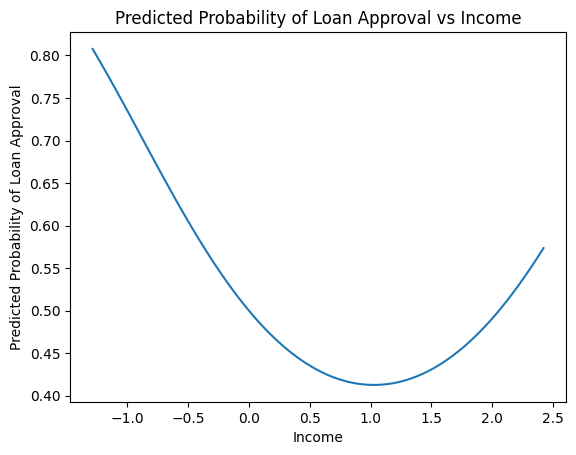

In [32]:
# Generate a range of income values for prediction
income_range = np.linspace(loan_default['income'].min(), loan_default['income'].max(), 100)
income_squared = income_range ** 2
# Create a dataframe for prediction
df_income = pd.DataFrame({'income': income_range, 'log_income_squared': income_squared})

# Get model coefficients for income and income squared
coef_income = result.params['income']
coef_income_squared = result.params['income_sqr']

# Calculate the predicted log-odds
log_odds = coef_income * income_range + coef_income_squared * income_squared

# Convert log-odds to probabilities
probabilities = np.exp(log_odds) / (1 + np.exp(log_odds))

# Plot the relationship
plt.plot(income_range, probabilities)
plt.xlabel('Income')
plt.ylabel('Predicted Probability of Loan Approval')
plt.title('Predicted Probability of Loan Approval vs Income')
plt.show()

## 5.3 R²-Metrics

In [33]:
# Calculate McFadden's pseudo R-squared
mcfadden_r2 = 1 - (result.llf / result.llnull)
print(f"McFadden's pseudo R-squared: {mcfadden_r2:.4f}")

# Calculate Cox & Snell R-squared
n = len(y)  # number of observations
cox_snell_r2 = 1 - np.exp((result.llnull - result.llf) * 2 / n)
print(f"Cox & Snell pseudo R-squared: {cox_snell_r2:.4f}")

# Calculate Nagelkerke R-squared
nagelkerke_r2 = cox_snell_r2 / (1 - np.exp(-result.llnull * 2 / n))
print(f"Nagelkerke pseudo R-squared: {nagelkerke_r2:.4f}")

McFadden's pseudo R-squared: 0.0950
Cox & Snell pseudo R-squared: 0.1007
Nagelkerke pseudo R-squared: -0.0490


**Interpretation**

We can see that our model has rather low R-squared values, meaning that it is not very useful for making predictions. Still, we can use it for hypothesis testing.

## 5.4 Confusion Matrix

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Generate predictions for the logistic regression model (probabilities)
logit_predictions_prob = result.predict()

# Convert probabilities to class labels (0 or 1) using a threshold of 0.5
logit_predictions_class = (logit_predictions_prob >= 0.5).astype(int)

# Predict using the null model (most frequent class)
most_frequent_class = y.mode()[0]

# Generate predictions for the null model (all predicted values are the most frequent class)
null_model_predictions = np.full_like(y, most_frequent_class)

# Confusion matrix for the null model
null_conf_matrix = confusion_matrix(y, null_model_predictions)

# Confusion matrix for the logistic regression model
logit_conf_matrix = confusion_matrix(y, logit_predictions_class)

# Print the confusion matrices
print("Confusion Matrix for the Null Model:")
print(null_conf_matrix)

print("\nConfusion Matrix for the Logistic Regression Model:")
print(logit_conf_matrix)

# Optionally, you can also print the classification report for the logistic regression model
print("\nClassification Report for the Logistic Regression Model:")
print(classification_report(y, logit_predictions_class))


Optimization terminated successfully.
         Current function value: 0.505333
         Iterations 6
Confusion Matrix for the Null Model:
[[112031      0]
 [ 36639      0]]

Confusion Matrix for the Logistic Regression Model:
[[108088   3943]
 [ 31341   5298]]

Classification Report for the Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86    112031
           1       0.57      0.14      0.23     36639

    accuracy                           0.76    148670
   macro avg       0.67      0.55      0.55    148670
weighted avg       0.73      0.76      0.70    148670



**Interpretation**

The confusion matrix shows that the null model predicts all loans as 'not approved,' leading to no true positives and 36,639 false negatives. The logistic regression model improves by correctly identifying 5,298 approved loans, though it still has 31,341 false negatives and introduces 3,943 false positives. This indicates that while the logistic regression model performs better than the null model, there is still room for improvement in predicting loan approvals more accurately.

## 5.5 Hypothesis Testing
**Odds-Ratio**

In [35]:
odds_ratios = pd.DataFrame({
    'Variable': result.params.index,
    'Odds Ratio': result.params.apply(lambda x: round(np.exp(x), 6))  # Exponentiate coefficients to get odds ratios
})

# Print odds ratios
print(odds_ratios) #evaluation and interpretation in #6.2

                                  Variable  Odds Ratio
const                                const    0.200994
income                              income    0.503558
income_sqr                      income_sqr    1.396053
dtir1                                dtir1    0.943816
ltv                                    ltv    1.645908
credit_score                  credit_score    1.010823
interest_rate_spread  interest_rate_spread    0.564374


## 5.6 Multicollinearity Testing

In [36]:
X = result.model.exog
# Get the variable names for the independent variables
variable_names = result.model.exog_names

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = variable_names
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

               Variable       VIF
0                 const  1.812759
1                income  1.808436
2            income_sqr  1.670201
3                 dtir1  1.121053
4                   ltv  1.036130
5          credit_score  1.000044
6  interest_rate_spread  1.057306


All VIFs are well below 5, meaning that multicollinearity is not an issue in this model meaning that the independent variables are not excessively correlated with each other, which is good for model stability.'

# **6. Interpretation**


## **6.1 Interpretation of Linear Regression**
We performed a linear regression analysis to understand what factors influence the size of the loan amount, so the goal was to determine the relationship between the independent variables (`Income`,`Property Value`,`Credit Score`,`Interest Rate Spread`,`Debt-to-Income Ratio`, `Income Squared `, `Property Value Squared`) and their effect on the dependent variable, which is `loan amount`.

**Significant Variables**:
- **`Income`** (p-value < 0.05): Income has a positive and significant effect on the loan amount, as expected, higher income increases the loan amount

- **`Property Value`** (p-value < 0.05): Property value is one of the strongest predictors of loan amount. Higher property value leads to larger loan amounts, which is consistent with the fact that loans are often based on collateral value.

- **`Interest Rate`** (p-value < 0.05): As interest rates increase, the loan amount tends to decrease, likely because higher rates increase the cost of borrowing.

- **`Debt-to-Income Ratio`** (DTI Ratio) (p-value < 0.05): The DTI ratio is also positively significant. A higher DTI may indicate that the borrower can handle more debt, leading to larger loan approvals.

- **`Credit Score`** (p-value > 0.05): Credit score did not have a significant impact in this model. While surprising, it suggests that within this dataset, credit score was not as critical in determining loan size.

- **`Income_sqr`** (p-value < 0.05): Income Sqaured has a negative and significant effect on the loan amount, as expected, higher income sqaured decreases the loan amount

- **`Property Value Sqr`** (p-value < 0.05): Higher property value sqaured leads to higher loan amounts, , which is consistent with the fact that loans are often based on collateral value


This analysis suggest that `income`, `property value`, `interest rate`, and `debt-to-income ratio` significantly influence the loan amount. However, `credit score` did not show a statistically significant effect in this particular model.

**R-Squared**

After log transformation of the loan amount, the **R-squared** is 0.647, although this value is not particularly high, it is still meaningful, it indicates that approximately 65% of the variance in the loan amount can be explained by the independent variables in the model. So, this suggests that while the model does not capture all the factors influencing the loan amount, it still provides a reasonable fit

The log-transformed model corrected for non-linearity but resulted in a slightly lower R-squared, suggesting that while the fit may have been reduced, the transformed model provides a better balance in terms of meeting regression assumptions.

**Conclusion**

We reject the null hypothesis (𝐻0) and accept the alternative hypothesis (𝐻1): `Income`, `property value`, `interest rate`, and `debt-to-income ratio` significantly influence the `loan amount`.
The analysis indicates that property value and income are the most influential factors in determining loan size, while `credit score`, in this case, did not play a significant role.

## **6.2 Interpretation of Logistic Regression**


We conducted a logistic regression to identify factors that predict loan approval (status). The dependent variable, `status`, indicates whether a loan was approved or not approved. The independent variables included in our model were `income`, `income squared` (to capture the non-linear effects of income), loan-to-value ratio (`LTV`), **debt-to-income** ratio (`DTIR1`), `credit _score`, and `interest rate spread`.

**Significance**

From the result table, we can conclude that all independent variables, except **credit score** (p-value = 0.091 > 0.05), are statistically significant (p-value < 0.05). This indicates that **credit score** may not be a strong predictor of loan approval, whereas **income**, **income squared**, **DTIR1**, **LTV**, and **interest rate spread** are statistically significant predictors.

**Odds Ratios**

For a more intuitive approach, we calculated the odds ratios:

- **An odds ratio of 1** indicates no effect,
- **Greater than 1** signifies a positive effect (increased odds),
- **Less than 1** indicates a negative effect (decreased odds) of the predictor variable on the outcome.

In our logistic regression analysis:

- The odds ratio for **Income_sqr** is **1.396053**. A one standard deviation increase in `income_sqr` is associated with a 39.61% increase in the odds of loan approval, holding other variables constant. This still reflects the non-linear relationship where higher income levels (above a certain threshold) increase the odds of loan approval, but now it’s relative to a standard deviation change.

- The **Debt-to-Income Ratio** (`DTIR1`) has an odds ratio of **0.943816**, implying that a one unit increase in the debt-to-income ratio decreases the odds of approval by **5.62%**.

- The **Credit Score** odds ratio is **1.010823**. A one standard deviation increase in `credit_score` is associated with a 1.08% increase in the odds of loan approval, holding other variables constant. However, since the effect is small and possibly not statistically significant, it implies that changes in credit score (relative to the mean) do not strongly influence loan approval in this model. (p-value = 0.091)

- The **Interest Rate Spread** odds ratio is **0.564374**. A one standard deviation increase in `interest_rate_spread` is associated with a 43.56% decrease in the odds of loan approval, holding other variables constant. This still reflects a significant negative relationship between higher-than-average interest rate spreads and the likelihood of loan approval.

- The **Loan-to-Value Ratio** (`LTV`) odds ratio is **1.645909**. A one standard deviation increase in `LTV` is associated with a 64.59% increase in the odds of loan approval, holding other variables constant. This means that higher-than-average loan-to-value ratios are associated with greater odds of loan approval.

- **Income** has an odds ratio of **0.503558**. A one standard deviation increase in income is associated with a 49.64% decrease in the odds of loan approval, holding other variables constant. The fact that income has a negative odds ratio, while income_sqr has a positive odds ratio, indicates a non-linear relationship, with diminishing returns or even negative effects at certain levels of income.


**Conclusion**

Based on the results of the logistic regression, we can reject the null hypothesis for all variables except **credit score**, meaning that **income**, **income squared**, **loan-to-value ratio (`LTV`)**, **debt-to-income ratio `(`DTIR1`)**, and **interest rate spread** are significant predictors of loan approval. The research question is addressed by identifying **income**, **income squared**, **LTV**, **DTIR1**, and **interest rate spread** as key factors that significantly predict whether a loan will be approved or rejected, while **credit score** does not appear to be a strong predictor in this case.


## 6.3 Conclusion

**Conclusion**

In this research project, we sought to analyze how key variables such as income, property value, debt-to-income ratio (DTI), and interest rate spread influence both loan amounts and loan approvals. Through the application of linear and logistic regression models, we were able to gain significant insights into the factors that most strongly correlate with loan-related outcomes.

**Key Findings:**
1. **Linear Regression Analysis**: Our analysis revealed that income and property value were the strongest predictors of loan amounts. In particular, income showed a positive correlation with loan size, indicating that higher-income applicants tend to receive larger loans. Property value also played a significant role, reinforcing the importance of collateral in loan decision-making processes.
   
2. **Logistic Regression Analysis**: The logistic regression model focused on loan approval decisions. Here, we found that while income and DTI were important predictors, non-linear effects like the squared income term provided a more nuanced view of how borrower characteristics affect loan approval probability. Specifically, higher income initially increased approval odds, but this effect diminished for extremely high-income applicants.

3. **Model Performance**: Both the linear and logistic regression models demonstrated reasonable predictive power. The R² metric for the linear regression model indicated a moderate fit, and the confusion matrix for the logistic regression model showed good predictive performance for loan approval, though there were some false positives.

**Limitations:**
Despite these findings, the analysis faced several limitations:
- **Data Quality**: Missing values had to be imputed, which may have introduced biases. While numerical values were handled with imputation techniques, categorical value handling could be improved.
- **Model Assumptions**: Both linear and logistic regressions rely on assumptions such as homoscedasticity and normality of residuals. Deviations from these assumptions, as noted in our Q-Q plots and residual analyses, may have impacted the accuracy of the models.
- **Feature Engineering**: While we included some non-linear terms (such as squared income), there may be other interactions or non-linear effects between variables that were not explored. These could provide further insights into loan-related outcomes.

**Suggestions for Improvement:**
To improve upon this analysis in future work, we propose the following:
1. **Feature Enrichment**: Expanding the dataset to include additional borrower characteristics or macroeconomic indicators (e.g., unemployment rates, interest rate trends) could enhance the models' predictive accuracy.
2. **Advanced Modeling Techniques**: Exploring machine learning approaches such as decision trees, random forests, or gradient boosting may help capture complex, non-linear relationships between variables that traditional regression methods might miss.
3. **Handling of Missing Data**: Utilizing more sophisticated imputation methods (such as multiple imputation or predictive modeling) could reduce bias introduced by missing values, leading to more reliable results.
4. **Cross-Validation**: Employing cross-validation techniques would provide more robust measures of model performance and generalizability, reducing the risk of overfitting.

In conclusion, this project has provided valuable insights into how various financial metrics influence loan amounts and approval decisions. While the models built offered solid predictions, further refinement through additional data and advanced techniques could lead to even more accurate and actionable conclusions.

# **7. Appendix**

**Complete Variable Description**

- **loan_limit:** Categorical, indicating the type of loan ("cf").
- **gender**: Categorical, with values like "Male," "Sex Not Available," and "Joint."
- **approv_in_adv**: Categorical, indicating whether the loan was approved in advance ("pre" or "nopre").
- **loan_type**: Categorical, with values like "type1" and "type2" describing the loan type.
- **loan_purpose**: Categorical, indicating the purpose of the loan ("p1," "p4").
- **credit_worthiness**: Categorical, describing the credit worthiness ("l1").
- **open_credit**: Categorical, whether the credit is open ("nopc").
- **business_or_commercial**: Categorical, whether the loan is for business/commercial purposes ("b/c" or "nob/c").
- **rate_of_interest:** Numerical, representing the interest rate.
- **Upfront_charges:** Numerical, representing any upfront charges.
- **term:** Numerical, length of the loan term.
- **Neg_ammortization:** Categorical, indicating negative amortization ("not_neg").
- **interest_only:** Categorical, whether the loan is interest-only ("not_int").
- **lump_sum_payment:** Categorical, whether a lump sum payment is involved ("not_lpsm").
- **construction_type**: Categorical, with values like "type1" and "type2."
- **occupancy_type**: Categorical, indicating whether the property is owner-occupied.
- **secured_by**: Categorical, how the loan is secured.
- **total_units**: Numerical, representing the number of units.
- **credit_type**: Categorical, describing the type of credit score bureau ("EXP," "EQUI," "CRIF").
- **credit_score**: Numerical, representing the borrower's credit score.
- **co-applicant_credit_type**: Categorical, co-applicant's credit bureau.
- **age**: Categorical, with ranges like "25-34," "55-64," etc.
- **submission_of_application**: Categorical, whether the application was submitted "to_inst" or "not_inst."
- **region**: Categorical, geographic region ("North," "South").
- **security_type**: Categorical, type of security.